<h1>Lending Club Case Study </h1>

<h2>Problem Statement: </h2>

Lending Club, a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
<br><br>
<li>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

<li>If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
<br><br>
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.



<h2>Objective: </h2>

The objective is to pinpoint applicants at risk of defaulting on loans, enabling a reduction in credit losses. This case study aims to achieve this goal through exploratory data analysis (EDA) using the provided dataset.
<br><br>
To understand the driving factors  behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

<h2>Importing necessary library

In [1]:
#importing the necessary libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore')

<h2> Loading data from csv </h2>

In [2]:
loan_data = pd.read_csv("loan.csv")

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_data.shape

(39717, 111)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<h2>Checking for NULL values : </h2>

There are lot of columns with null values. Dropping all those columns as they would not help us in the analysis

In [6]:
# Dropping the columns with more than 65% null values
loan_data=loan_data.drop(loan_data.columns[loan_data.apply(lambda loan:(loan.isnull().sum()/len(loan))*100>=65)],axis=1)
loan_data.shape

(39717, 55)

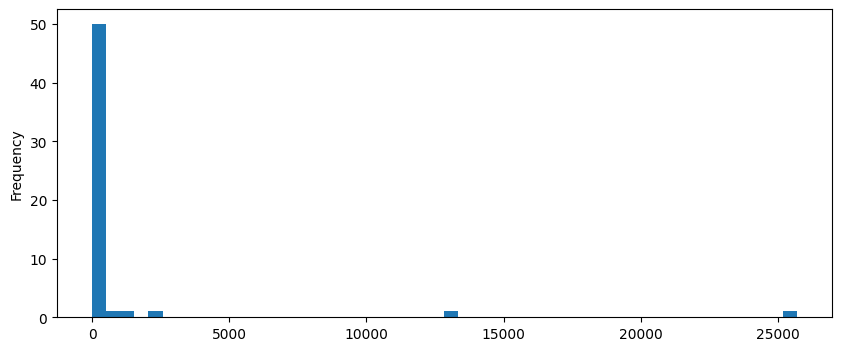

In [7]:
v=loan_data.isnull().sum()
v.plot(kind='hist', bins=50, figsize = (10,4))
plt.show()

In [8]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.shape

(39717, 55)

<h2> Checking for unique values: </h2>

If the column has only one unique value then it would not help us in the analysis. So dropping all column with only one unique value.

In [9]:
column_unique = loan_data.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [10]:
#removing column having unique_values=1
column_list = column_unique[column_unique.values == 1]
loan_data.drop(columns=list(column_list.index) , inplace=True)
loan_data.shape

(39717, 46)

<h2> Dropping rows with duplicate data </h2>

In [11]:
loan_data[loan_data.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


No duplicate rows found

<h2>Dropping columns: </h2>

The company wants to know which loan applications are risky . There are few columns which are created after loan application is processed and will not help in our analysis. Some features like id,member_id,url, zip_code etc are unique for every record and will not help in the analysis.
So dropping those columns. 
Dropping post loan approval features:
delinq_2yrs,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee
recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,chargeoff_within_12_mths,mths_since_last_delinq,mths_since_last_record

In [12]:
#Dropping columns which will not contribute to the analysis.
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","delinq_2yrs","mths_since_last_delinq","revol_bal","inq_last_6mths"]
loan_data.drop(columns=del_cols, inplace=True)
loan_data.shape

(39717, 27)

In [13]:
#columns title,emp_title,desc contains textual data. So dropping those columns as it will not help in analysis
#loan_data['emp_title'].value_counts()
loan_data.drop(columns=['title','emp_title','desc'], inplace=True)

In [14]:
#Final set of columns
loan_data.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

<h2>Dropping Records:</h2>
<br>
Dropping records where loan_status = 'Current'
As the loan which are in progress will not help us in the analysis whether the borrower will likely to default or not. So dropping those rows.

In [15]:
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [16]:
loan_data = loan_data[~(loan_data['loan_status'] == 'Current')]
loan_data.shape

(38577, 24)

<h2> Data Conversion </h2>

In [17]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [18]:
# Convert the columns loan_amnt,dti,funded_amnt_inv and funded_amnt as float
loan_data = loan_data.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})


<b>Convert term (term) to float to match the data and remove 'months'

In [19]:
loan_data['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [20]:
loan_data['term']= loan_data['term'].apply(lambda x: int(x.replace('months',"")))
loan_data['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

<b>Convert interest rate (int_rate) to float to match the data and remove '%'

In [21]:
loan_data['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [22]:
#Let's remove %
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(x.replace('%',"")))
loan_data['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [23]:
loan_data['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [24]:
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x: float(str(x).replace('%',"")))
loan_data['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [25]:
loan_data['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [26]:
loan_data['sub_grade'].value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

<b>Convert issue_d  to timestamp to match the data

In [27]:
loan_data['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [28]:
#Converting the column issue_d from string to DateTime
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

<b>Rounding off the below columns to two decimals points:

In [29]:
# Rounding off the below columns to two decimals points.
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_data[c] = loan_data[c].apply(lambda x: round(x,2))
    print(loan_data[c])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [30]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  float64       
 1   funded_amnt           38577 non-null  float64       
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            37544 non-null  object        
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

In [31]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.7,9,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,car,GA,1.00,Apr-99,5,3,0,9.4,4,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,small_business,IL,8.72,Nov-01,2,2,0,98.5,10,0.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,other,CA,20.00,Feb-96,1,10,0,21.0,37,0.0
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3 years,RENT,...,wedding,AZ,11.20,Nov-04,3,9,0,28.3,12,0.0


<h2>Handle missing values: </h2>

In [32]:
loan_data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [33]:
#Count of missing values in column emp_length:
print("Before missing value treatment:")
empty_count=loan_data['emp_length'].isna().sum()
print(f"Count of missing values in column emp_length:" + str(empty_count))

loan_data['emp_length'].value_counts()

# Missing value treatment
# Replacing with mode for emp_length
loan_data['emp_length'] = loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0])

print("After missing value treatment:")
new_count=loan_data['emp_length'].isna().sum()
print(f"Count of missing values in column emp_length:" + str(new_count))


Count of missing values in column emp_length:1033
After missing value treatment:
Count of missing values in column emp_length:0


In [34]:
loan_data['emp_length'].value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

<b>Converting emp_length to integer values

In [35]:
# Converting emp_length to integer values
# Converting emp_length as numerical data for more effective statistical analysis
loan_data['emp_length'] = loan_data['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})
loan_data['emp_length'].value_counts()

emp_length
10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [36]:
loan_data.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
pub_rec_bankruptcies    697
dtype: int64

In [37]:
loan_data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [38]:
loan_data.revol_util.value_counts()

revol_util
0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: count, Length: 1088, dtype: int64

In [39]:
#There are 697 null values for pub_rec_bankruptcies and 50 null values for revol_util . 
#Dropping those rows as they cannot be imputed.
loan_data.shape
loan_data = loan_data[loan_data.pub_rec_bankruptcies.notna()]
loan_data = loan_data[loan_data.revol_util.notna()]
loan_data.shape

(37830, 24)

In [40]:
loan_data.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [41]:
loan_data.dtypes

loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
earliest_cr_line                object
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
dtype: object

<h2>Outlier Treatment: </h2>

<b>Check outlier values in continuous columns like loan_amnt, int_rate, annual_inc, dti via box plot:

<Axes: xlabel='annual_inc'>

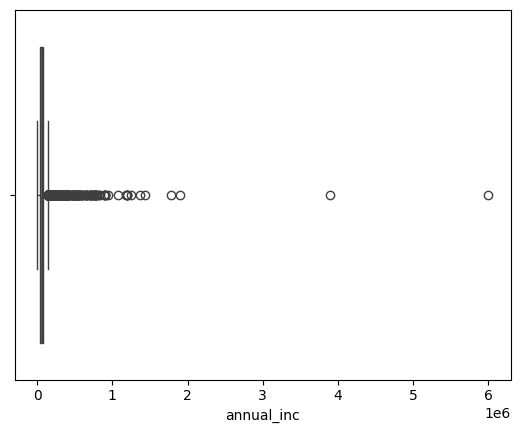

In [42]:
#Checking for outlier in annual_inc
loan_data.annual_inc.value_counts().sort_index(ascending=False)
sns.boxplot(x=loan_data.annual_inc)

Clearly , Annual income has outliers. the annual_inc is increasing in expontntial format around 95th percentile. Thus we can remove values greater than 95th percentile.

In [43]:
loan_data.annual_inc.describe([0.9,0.95,0.98,0.99,0.999])

count    3.783000e+04
mean     6.879568e+04
std      6.356907e+04
min      4.000000e+03
50%      5.900000e+04
90%      1.150000e+05
95%      1.400040e+05
98%      1.860000e+05
99%      2.340000e+05
99.9%    7.000000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [44]:
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,95)]

<Axes: xlabel='annual_inc'>

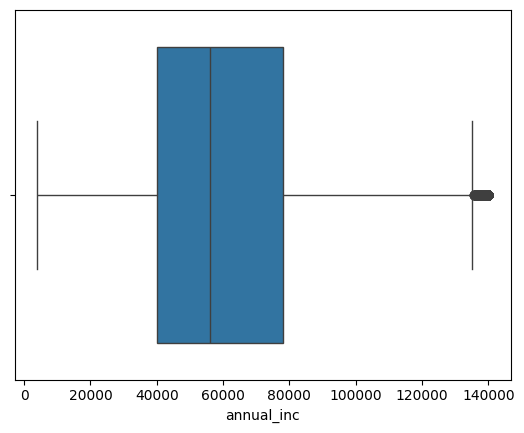

In [45]:
sns.boxplot(x=loan_data.annual_inc)

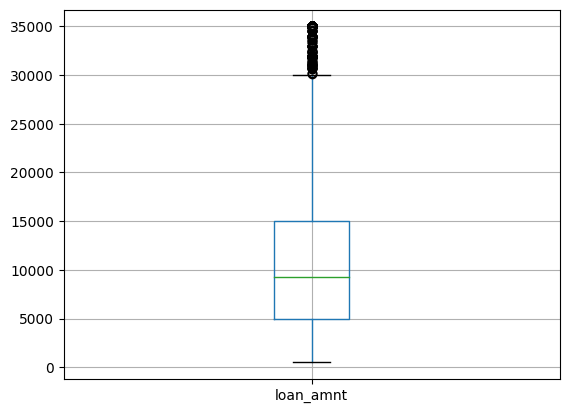

In [46]:
#Checking for outlier in loan_amnt
loan_data.boxplot(column=['loan_amnt']);
#Upper fence is around 29k  whereas max is 35k which is not much more then upper fence thus will not have much impact on the analysis.

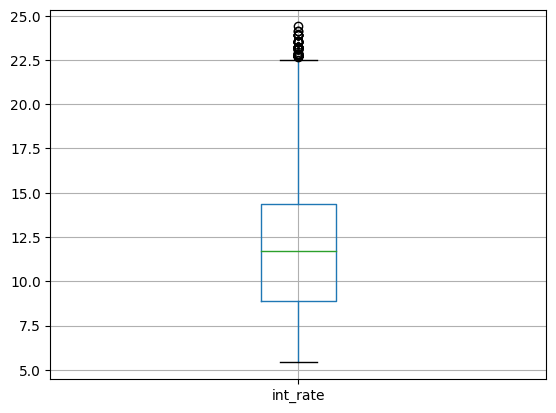

In [47]:
#Checking for outlier in int_rate
loan_data.boxplot(column=['int_rate']);
#Upper fence is near 22 whereas max is 24 which is not much more then upper fence thus will not have much impact on the analysis.

Axes(0.125,0.11;0.775x0.77)


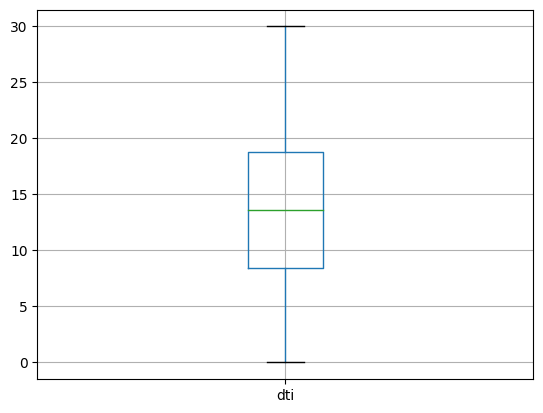

In [48]:
#Checking for outlier in dti
print(loan_data.boxplot(column=['dti']))

There is no outlier in dti.

The data has been cleaned and outliers removed, we can move ahead with the analysis.

<h2> Derived Column: </h2>

<b>Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_q) from column "issue_d"

In [49]:
loan_data['issue_m'] = pd.DatetimeIndex(loan_data['issue_d']).month
loan_data['issue_y'] = pd.DatetimeIndex(loan_data['issue_d']).year
#loan_data['issue_y'].value_counts()
loan_data.drop(columns=['issue_d'], inplace=True)

In [50]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_m,issue_y
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,RENT,...,27.65,Jan-85,1,3,0,83.7,9,0.0,12,2011
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,0,RENT,...,1.00,Apr-99,5,3,0,9.4,4,0.0,12,2011
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,RENT,...,8.72,Nov-01,2,2,0,98.5,10,0.0,12,2011
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,RENT,...,20.00,Feb-96,1,10,0,21.0,37,0.0,12,2011
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,RENT,...,11.20,Nov-04,3,9,0,28.3,12,0.0,12,2011


In [51]:
# Categorising Months into quaters
def derive_quarter(column):
    if column < 4:
        return 'Q1' 
    elif (column >= 4) and (column < 7):
        return 'Q2'      
    elif (column >= 7) and (column < 9):
        return 'Q3'  
    else:
        return 'Q4' 
    
loan_data['issue_q'] = loan_data.apply(lambda x : derive_quarter(x['issue_m']), axis = 1)

In [52]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_m,issue_y,issue_q
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,RENT,...,Jan-85,1,3,0,83.7,9,0.0,12,2011,Q4
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,0,RENT,...,Apr-99,5,3,0,9.4,4,0.0,12,2011,Q4
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,RENT,...,Nov-01,2,2,0,98.5,10,0.0,12,2011,Q4
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,RENT,...,Feb-96,1,10,0,21.0,37,0.0,12,2011,Q4
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,RENT,...,Nov-04,3,9,0,28.3,12,0.0,12,2011,Q4


The data has been cleaned and outliers removed, we can move ahead with the analysis.

<h3>Helper Functions for creating plots:</h3>

In [53]:
def dist_and_boxplot(var,col_name):
    """
    Create a Seaborn  distplot and boxplot for a specified column in a DataFrame.

    Parameters:
        var (pd.Series): The Series containing the data.
        col_name (str): The name of the column.

    Returns:
        None
    """
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.distplot(a=var, rug=True)
    plt.subplot(1,2,2)
    sns.boxplot(data=var)
    plt.suptitle(col_name + ' distribution')
    return plt

In [58]:
def plot_bar_graph(dataframe, x_column, y_column=None, title=None, xlabel=None, ylabel=None):
    """
    Create a Seaborn bar plot for a specified column in a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to be plotted on the x-axis.
        y_column (str, optional): The name of the column to be plotted on the y-axis. Default is None.
        title (str, optional): The title of the plot. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.

    Returns:
        None
    """

    # Create the bar plot
    plt.figure(figsize=(10,5))
    sns.countplot(data=dataframe, x=x_column , palette= 'Spectral')

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=90)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

In [59]:
def plot_graph(dataframe, x_column, y_column=None,hue=None, title=None, xlabel=None, ylabel=None):
    """
    Create a Seaborn bar plot with hue for a specified column in a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to be plotted on the x-axis.
        y_column (str, optional): The name of the column to be plotted on the y-axis. Default is None.
        title (str, optional): The title of the plot. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.

    Returns:
        None
    """

    # Create the bar plot
    plt.figure(figsize=(10,5))
    sns.countplot(data=dataframe, x=x_column ,hue=hue, palette= 'PRGn')

    # Display frequency on top of the bars with rotation
    #if y_column:
    for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=90)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

In [ ]:
def create_bar_plot(data,x,y,xlabel,ylabel):
    plt.figure(figsize=(10,5))
    sns.barplot(data=loan_data,y='int_rate',x=x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Comparison of '+ xlabel +' Based On '+ ylabel,fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
def create_boxplot(x,y,data,x_label,y_label):
    plt.figure(figsize=(15,4))
    sns.boxplot(x=x, y=y,data=data)
    plt.title(x_label + " vs "+ y_label)
    plt.xticks(rotation=90)
    plt.show()


In [60]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_m',
       'issue_y', 'issue_q'],
      dtype='object')

<h5><b>Variables identified for univariate analysis:</h5> <br>
<b>Ordered Categorical Variables: </b>
    1. Grade (grade)
    2. Sub grade (sub_grade)
    3. Term (36 / 60 months) (term)
    4. Employment length (emp_length)
    5. Issue year (issue_y)
    6. Issue month (issue_m)
    7. Issue Quarter (issue_q)

<b>Unordered categorical data</b>
    1. Address State (addr_state)
    2. Loan purpose (purpose)
    3. Home Ownership (home_ownership)
    4. Loan status (loan_status)
    5. verification_status

<b>Quantitative variables </b>
    1. Loan_amount
    2. Funded_amount
    Funded_amount_inv
    DTI 
    Annual_income
    int_rate
    installment
    pub_rec_bankruptcies

<h2> Analysis of Unordered Categorical Variables : </h2>

loan_status

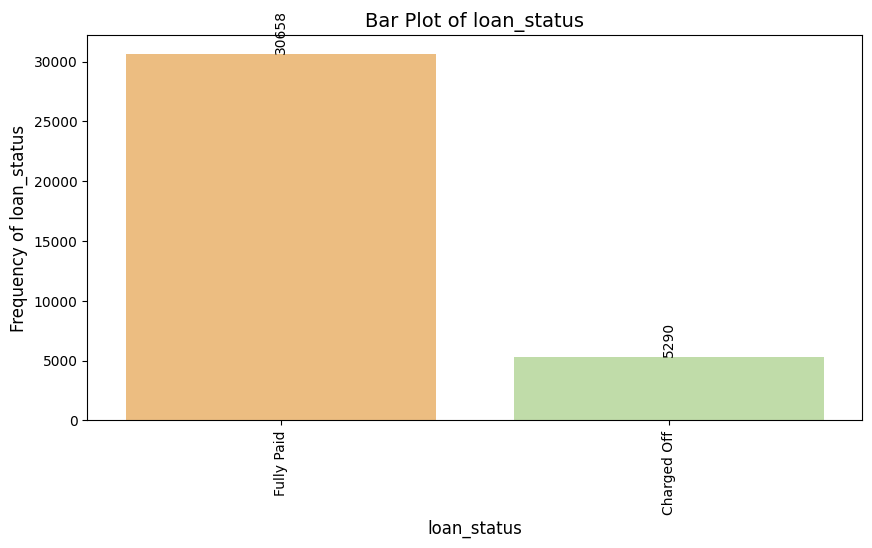

In [61]:
# Countplot for loan_status
cat_var='loan_status'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')

<b> Inference : 85% of borrowers has paid the loan fully. where are 14% are defaulted the loan </b>

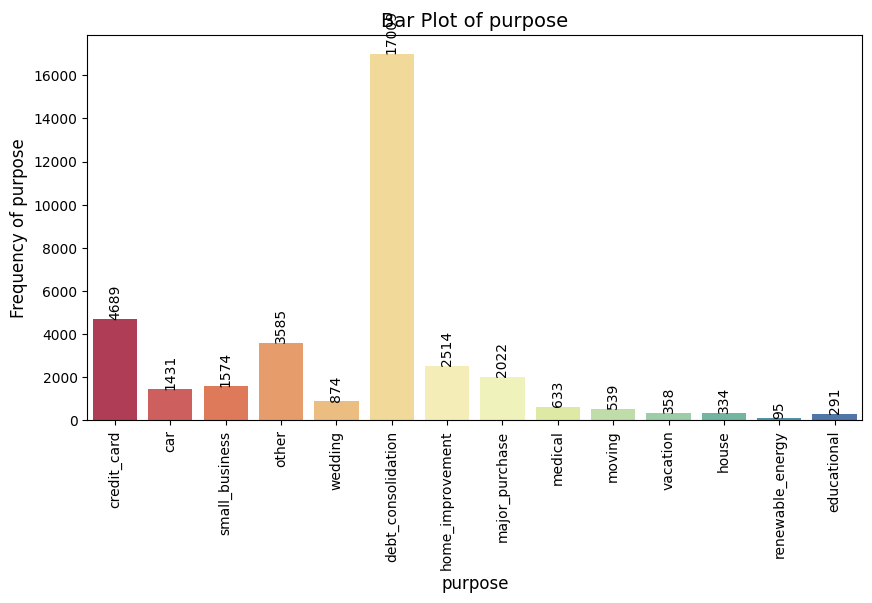

In [62]:
# Countplot for purpose
cat_var='purpose'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')


<b>Inference : Majority of loan application are taken for the purpose of debt_consolidation</b>

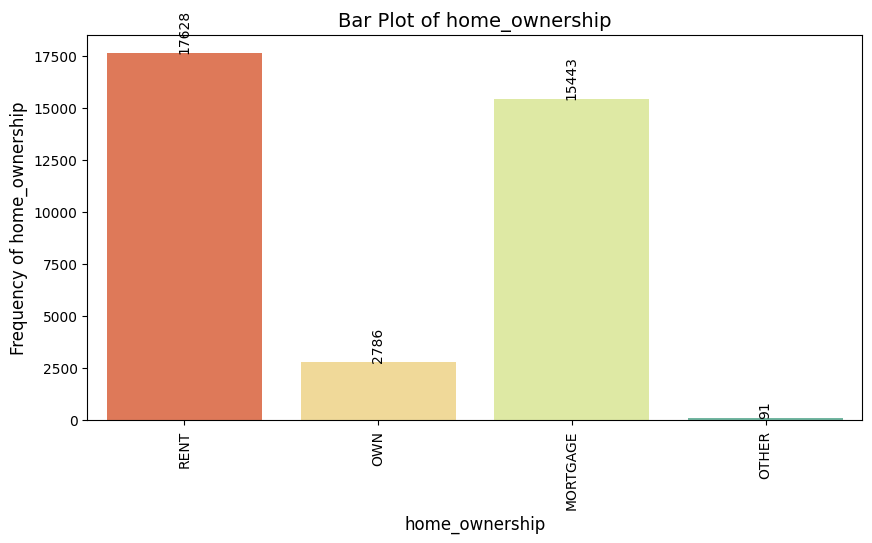

In [63]:
# Countplot for home ownership
cat_var='home_ownership'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')


<b> Inference : Majority of the home owner status are in status of RENT and MORTGAGE </b>

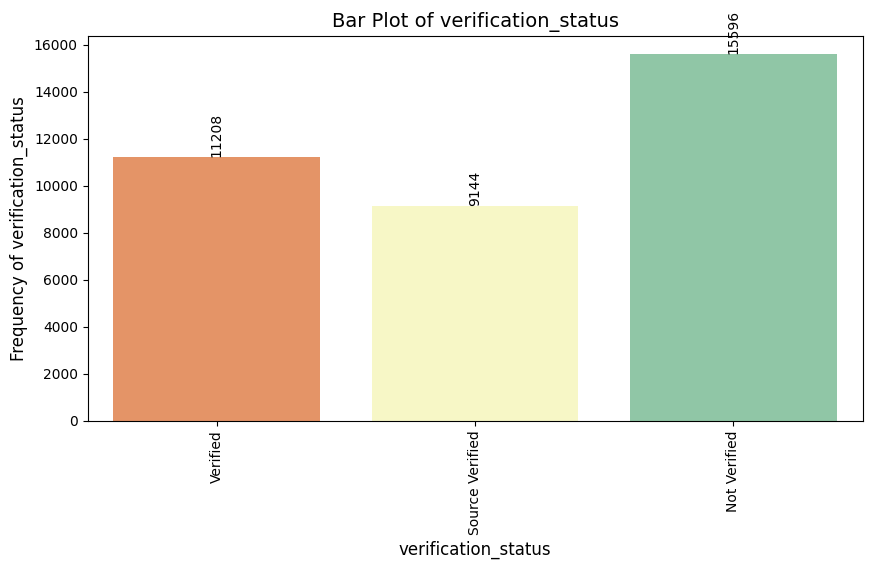

In [64]:
# Countplot for verification_status
cat_var='verification_status'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')


<b> Inference : Majority of loans were given without verification of applicants income. </b>

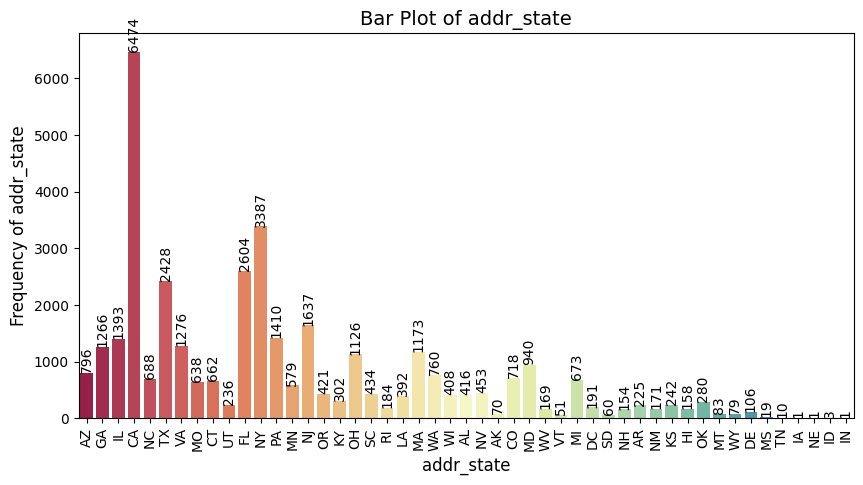

In [65]:
# Countplot for addr_state
cat_var='addr_state'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')


<b> Inference : Majority of loans are taken from CA and NY. </b>

<h2>Analysis of Unordered Categorical Variable: </h2>

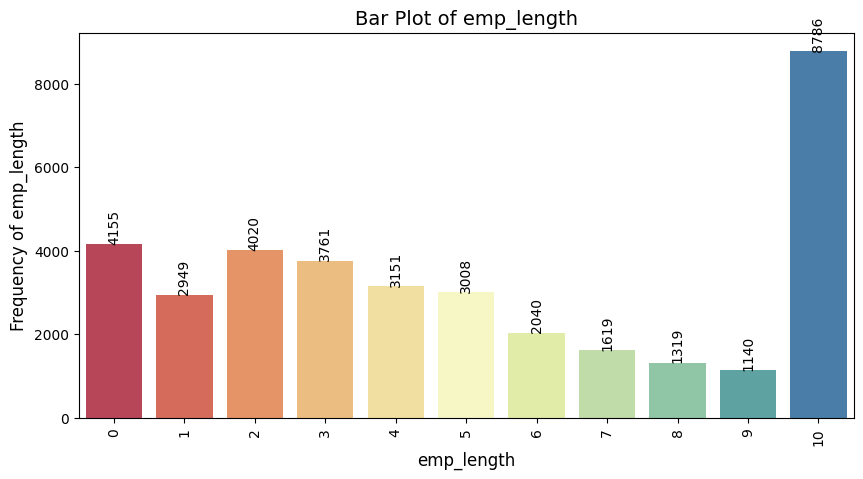

In [66]:
# Countplot for emp_length
cat_var='emp_length'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')


<b> Inference : Most Borrowers have mostly 10+ years of employment length. </b>

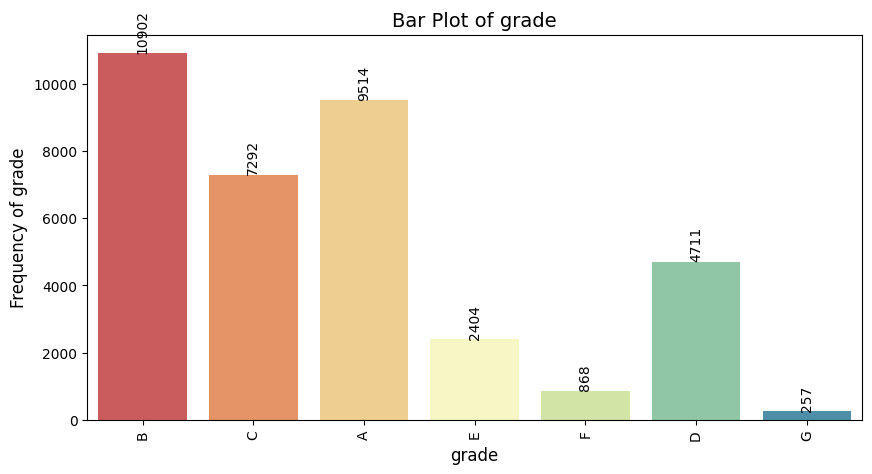

In [67]:
# Countplot for grade
cat_var='grade'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')


<b> Most borrowers fall under A and B grades as compared to any other grades </b>

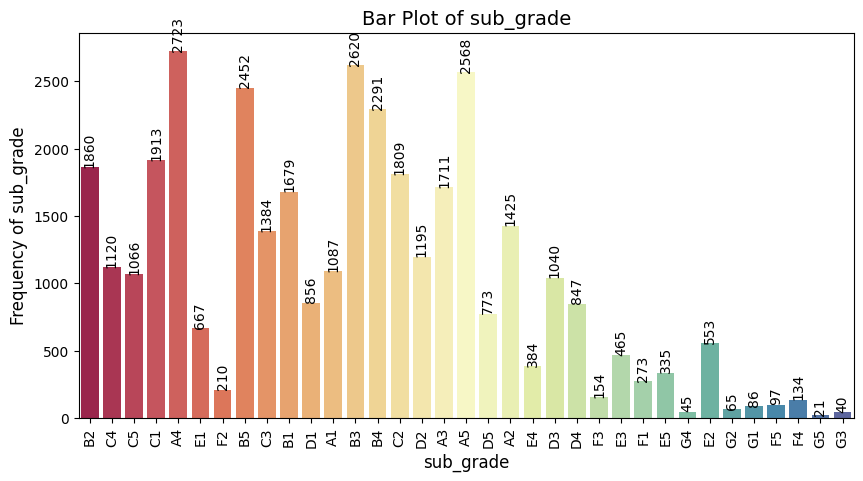

In [68]:
# Countplot for sub_grade
cat_var='sub_grade'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')


<b>Most borrowers belong to A4, A3, B5 sub grades </b>

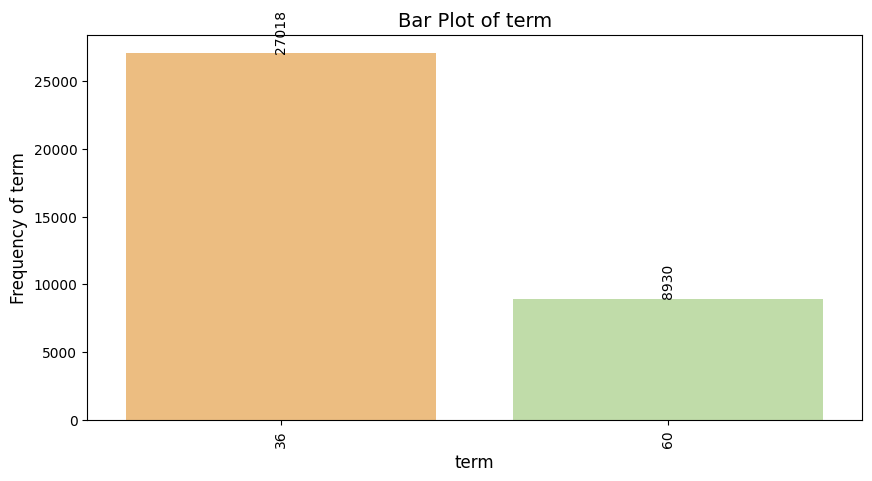

In [69]:
# Countplot for term
cat_var='term'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')


<b>Borrowers have taken loan tenure of 36 months tenure more than 60 months.

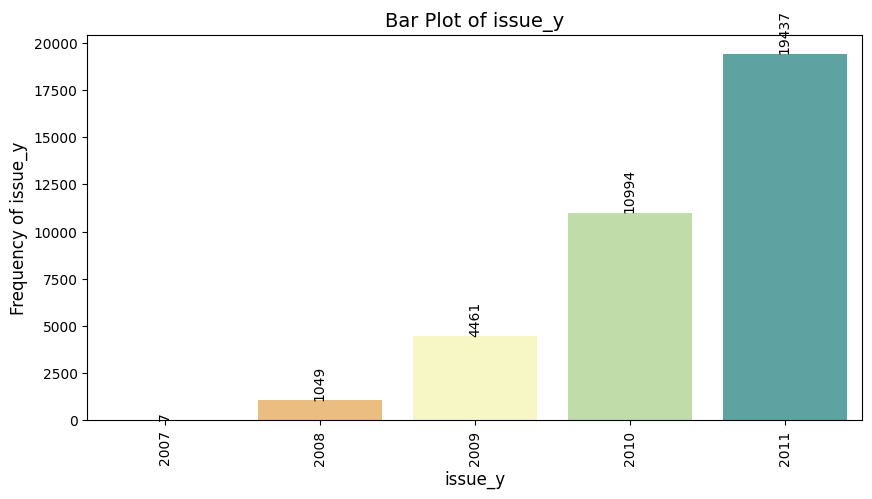

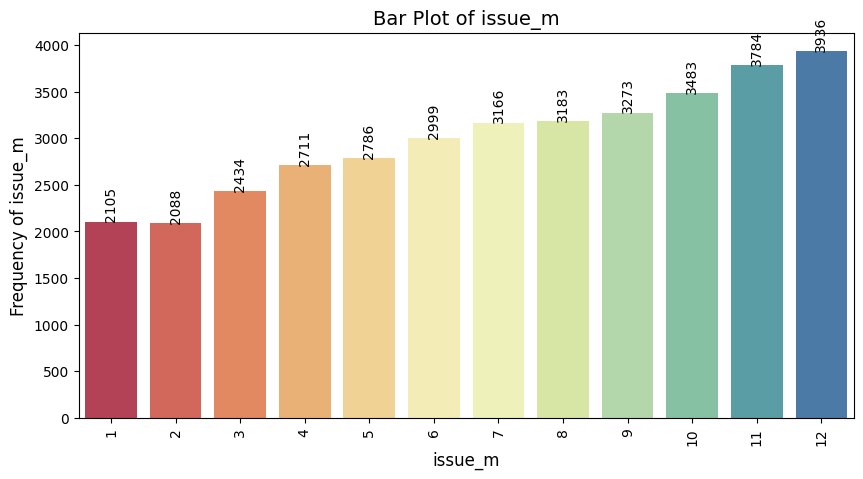

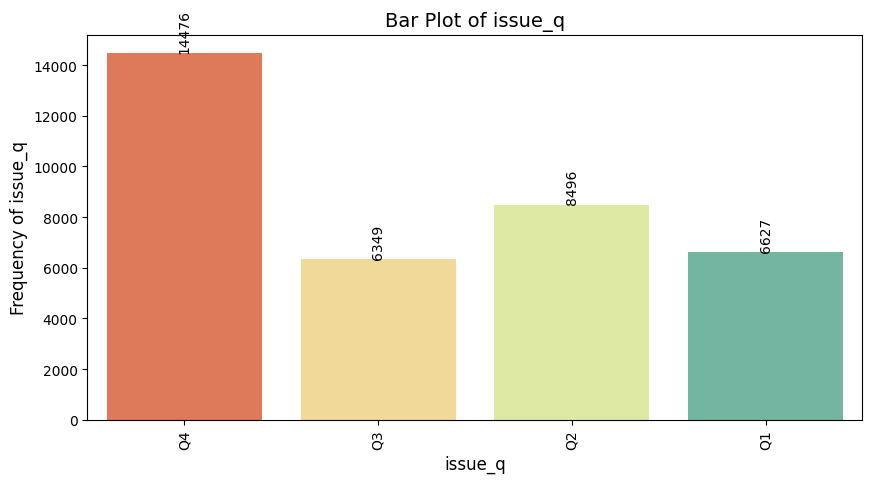

In [70]:
# Countplot for issue_y
cat_var='issue_y'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')

# Countplot for issue_m
cat_var='issue_m'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')

# Countplot for issue_q
cat_var='issue_q'
plot_bar_graph(loan_data,x_column = cat_var,y_column = cat_var,title = f'Bar Plot of {cat_var}',xlabel = cat_var,ylabel=f'Frequency of {cat_var}')


<b> Inference :
<b> <li>The number of loans issued has doubled from every year.
<b><li>There are more loans issued in last 3 months every end of the year i.e., Oct, Nov and Dec.
<b><li>Quarter Q4 has highest number of loans issued. <b>

<h2>Quantitative variable analysis:</h2>

Let's see the distribution of loan amount , funded amount and funded amount by investor using distribution plot to analyze relationship between them

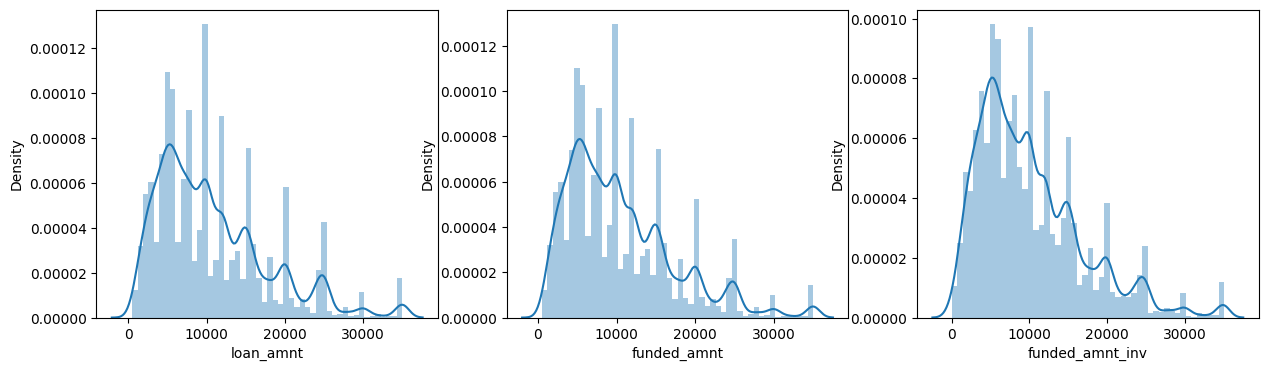

In [71]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,3,1)

#Distribution plot 1
sns.distplot(loan_data['loan_amnt'],kde = True)

#Setting subplot index
plt.subplot(1,3,2)

#Distribution plot 2
sns.distplot(loan_data['funded_amnt'],kde = True)

#Setting subplot index
plt.subplot(1,3,3)

#Distribution plot 3
sns.distplot(loan_data['funded_amnt_inv'],kde = True)
plt.show()

<b>Observation:
From above, we can say that amount distribution looks very similar. So we will use only loan_amnt for our further analysis.<br>

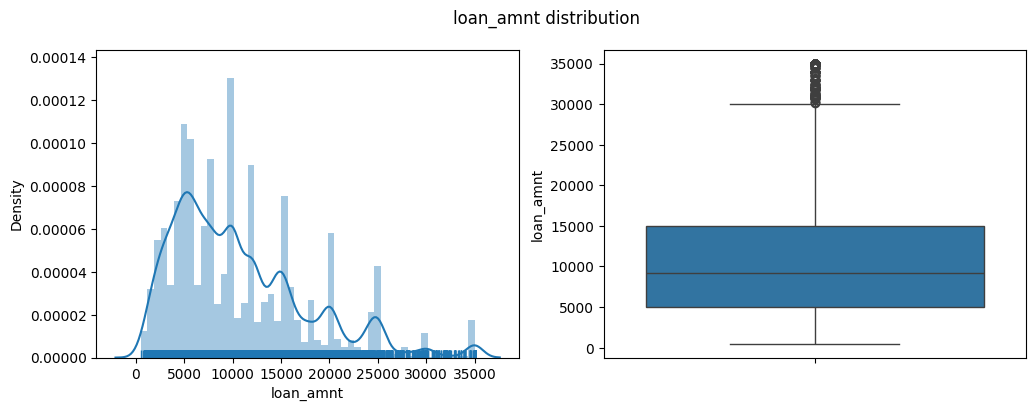

In [72]:
plt=dist_and_boxplot(loan_data['loan_amnt'],'loan_amnt')
plt.show()

<b>Observation:<br>
From loan amount data, we can say that most of them have taken loan amount of 5000 to 15000.

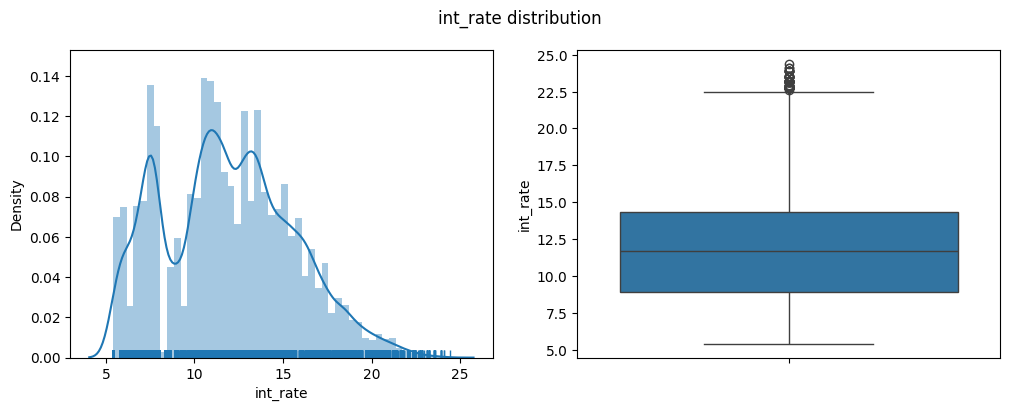

In [73]:
#dist_and_boxplot for int_rate
plt=dist_and_boxplot(loan_data['int_rate'],'int_rate')
plt.show()

<b> Inference :From interest rate data, we can say that most of the interest rate lies between 9% to 14.5%.

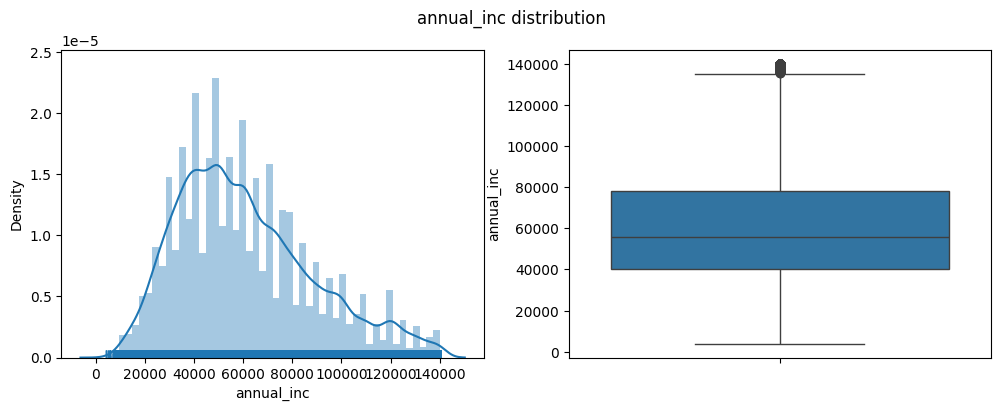

In [74]:
#dist_and_boxplot for annual_inc
plt=dist_and_boxplot(loan_data['annual_inc'],'annual_inc')
plt.show()


<b>From annual income data, we can say that most of the borrower's annual income are in range of 40k to 60k.

Installment- The monthly payment owed by the borrower if the loan originates.

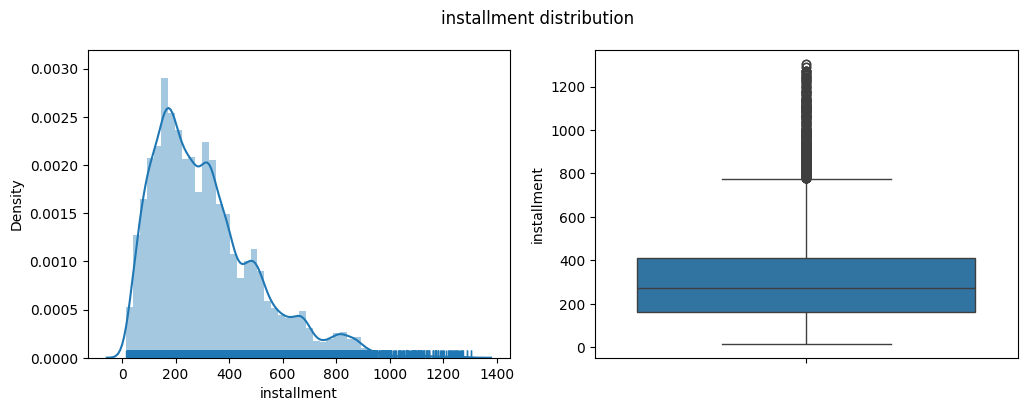

In [75]:
#dist_and_boxplot for installment
plt=dist_and_boxplot(loan_data['installment'],'installment')
plt.show()

<b>Median value of installment is 280. The installment amount for borrower is betwen 200 - 400 USD<b>

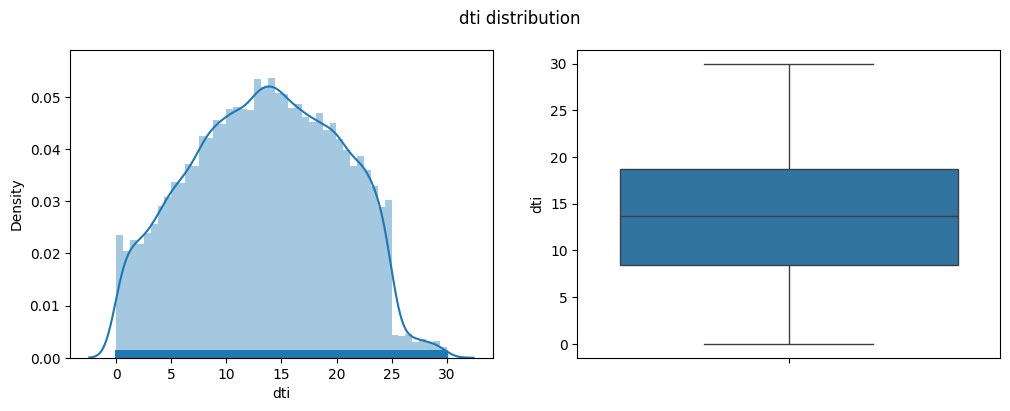

In [76]:
#dist_and_boxplot for dti
plt=dist_and_boxplot(loan_data['dti'],'dti')
plt.show()

<b>Loan applicants had very high debt-to-income ratios ranging between 9 to 19.

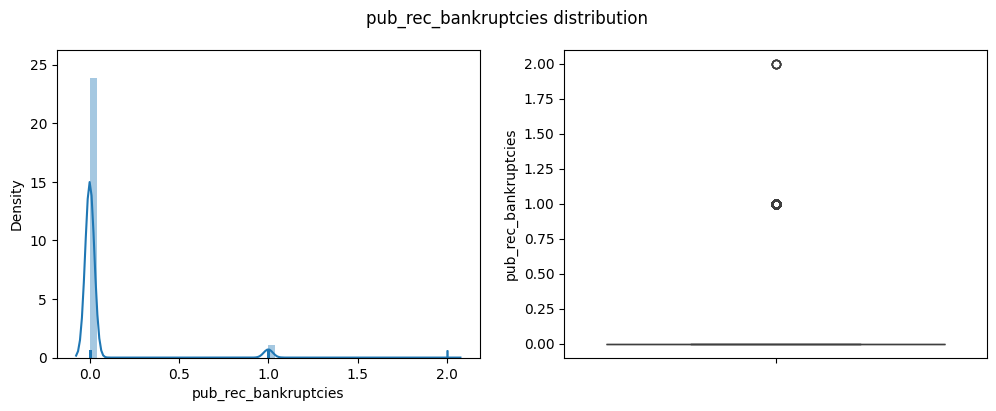

In [77]:
#dist_and_boxplot for pub_rec_bankruptcies
plt=dist_and_boxplot(loan_data['pub_rec_bankruptcies'],'pub_rec_bankruptcies')
plt.show()

<b>Majority of the loan applicants are in the category of not having an public record of bankruptcies

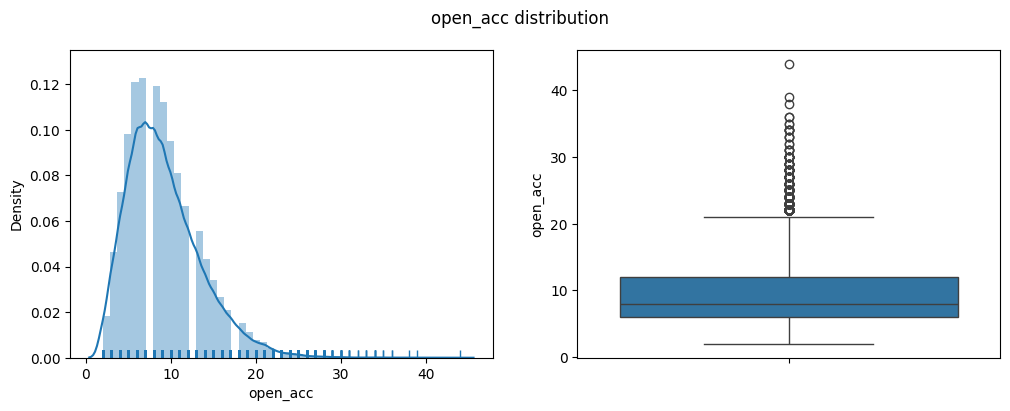

In [78]:
plt=dist_and_boxplot(loan_data['open_acc'],'open_acc')
plt.show()

<h1>Observations and Inferences from Univariate Analysis</h1>


<ol>    
    <b>Ordered Categorical Variables</b>
<li>Grade B had the highest number of loan applicants, with a total of 10421 applicants

<li>The majority of loan has a term of 36 months compared to 60 months.

<li> 
Majority of borrowsers have working experience greater than 10 years.

<li>
The year 2011 recorded the highest number of loan applications. This shows a positive trend in the number of applicants facing loan defaults over the years. Thus we can say that the loan approval rate is increasing with the time.

<li> Most loans were  taken during the 4th quarter mostly in October, November ,December.
    </ol><ol>
   <b>Unordered Categorical Variables</b>
<li>California had the highest number of loan applicants followed by New York. 

<li>Debt consolidation was the primary loan purpose for most loan applicants.

<li>The majority of loan participants lived in rented houses or mortgage.
<li> A significant number of loan participants were loan defaulters who were unable to clear their loans.
<li>About 50% of the borrowers are verified by the company or have source verified.
    </ol>
    <ol>
<b>Quantitative variables </b>
<li>Most loan applicants had annual salaries less than 40,000 USD
<li>Among loan participants, interest rate lies between 13%-17%.
<li>Most of the borrowers have taken loan amount between 5000 and 15000.
<li>Majority of the borrowers have very large debt compared to the income in the range of 10-15 DTI ratio.
<li>It's observed that the majority of borrorowers had monthly installment amounts falling within the range of 160-440 USD.
<li>Majority of the borrowers have no record of Public Recorded Bankruptcy.
</ol>

<h2>Segmented Univariate Analysis: <h2>

In [79]:
#Comparing columns wrt Loan_status:

In [80]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_m',
       'issue_y', 'issue_q'],
      dtype='object')

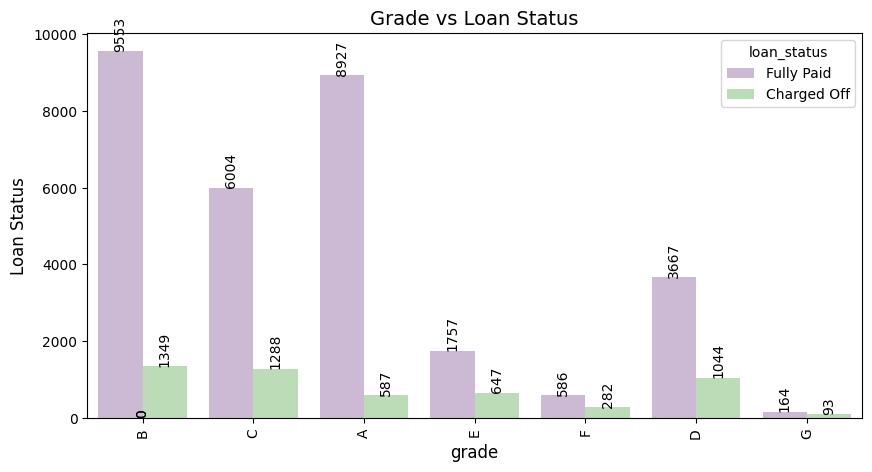

In [81]:
## Distribution of Grade based on loan_status
plot_graph(loan_data, x_column='grade',hue='loan_status',
           ylabel= 'Loan Status',xlabel= 'grade',title='Grade vs Loan Status',)

<b> Inference : The loan applicants belonging to Grades B, C and D contribute to most number of "Charged Off" loans. Number of charge off loans increases as we move from grade A to G.

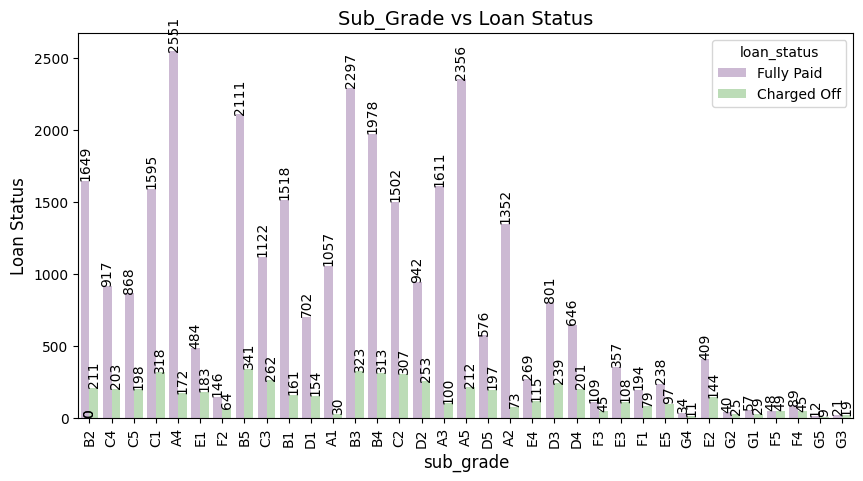

In [82]:
## Distribution of SubGrade based on loan_status
plot_graph(loan_data, x_column='sub_grade',hue='loan_status',
           ylabel= 'Loan Status',xlabel= 'sub_grade',title='Sub_Grade vs Loan Status',)

<b>Loan applicants belonging to Sub Grades B3, B4,F5, G3 , G5 and B5 are likely to Charge off. Charged Off consumers are more for C,D,E,F,G related sub grade.

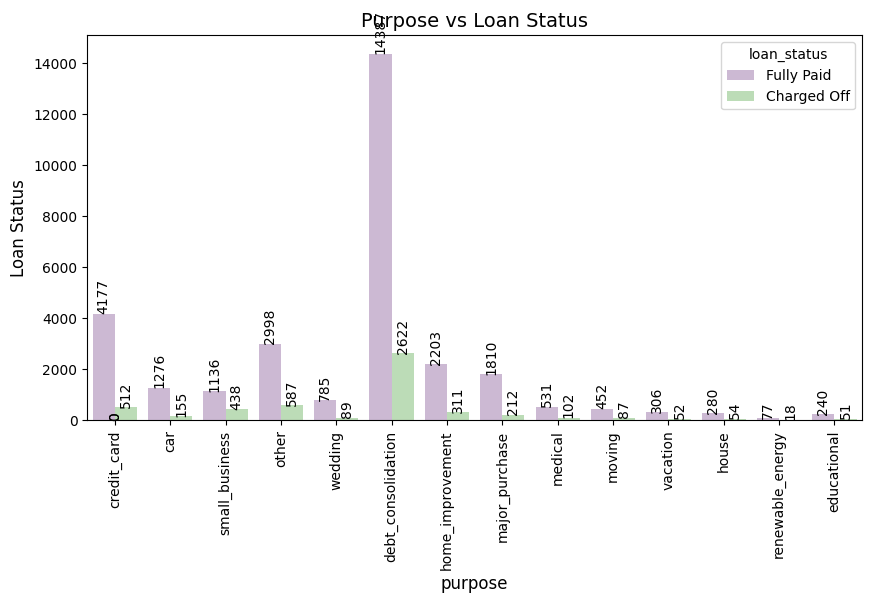

In [83]:
# Distribution of purpose based on loan_status
plot_graph(loan_data, x_column='purpose',hue='loan_status',ylabel= 'Loan Status',
           xlabel= 'purpose',title='Purpose vs Loan Status')


<b>Inference: Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

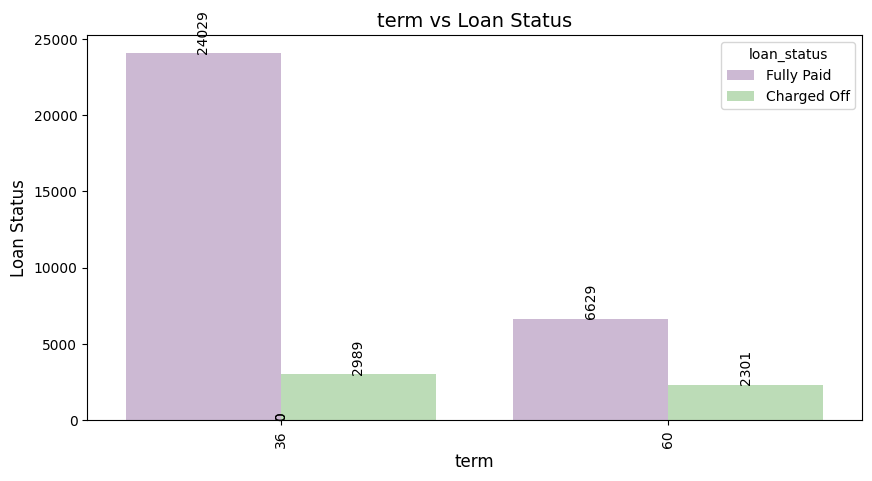

In [84]:
# Distribution of term based on loan_status
plot_graph(loan_data, x_column='term',hue='loan_status',ylabel= 'Loan Status',
           xlabel= 'term',title='term vs Loan Status')


<b>Inference: The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

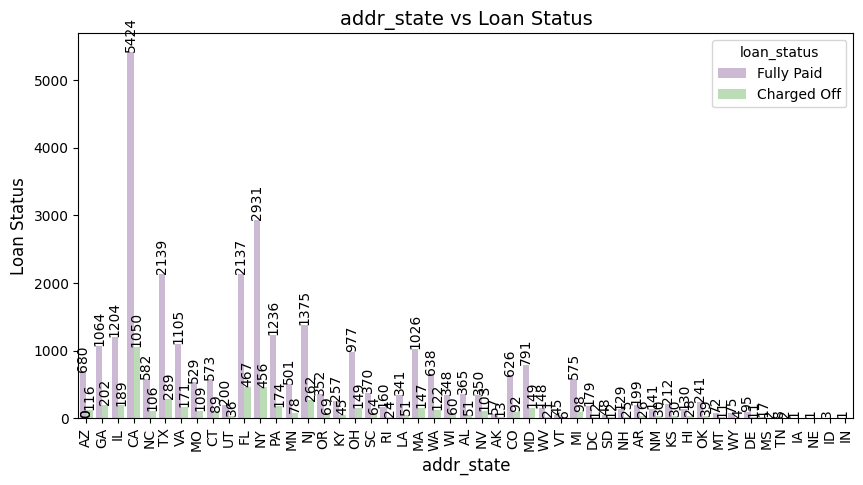

In [85]:
# Distribution of term based on loan_status
plot_graph(loan_data, x_column='addr_state',hue='loan_status',ylabel= 'Loan Status',
           xlabel= 'addr_state',title='addr_state vs Loan Status')


<b>The borrowers who are from NV, AK, TN state are mostly getting charged off.

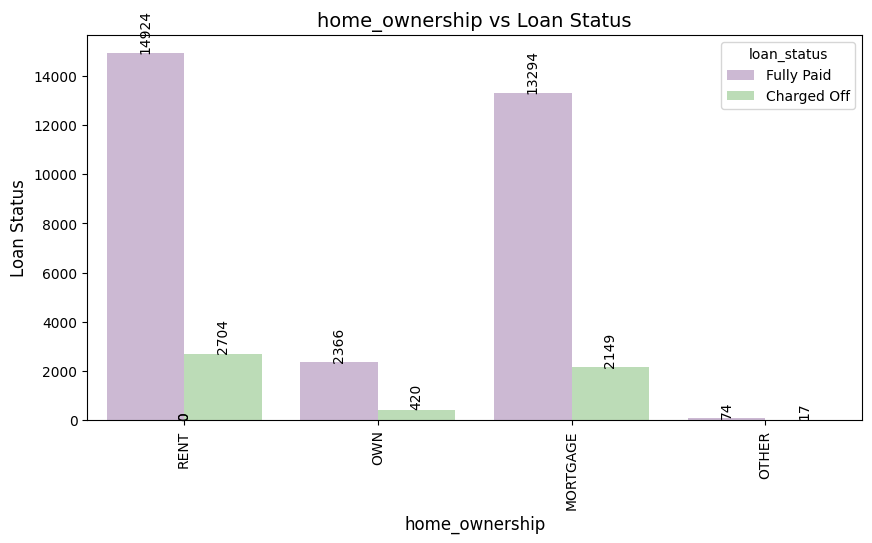

In [86]:
# Distribution of term based on loan_status
plot_graph(loan_data, x_column='home_ownership',hue='loan_status',ylabel= 'Loan Status',
           xlabel= 'home_ownership',title='home_ownership vs Loan Status')


The loan applicants who live in a rented or mortgaged house are more likely to default

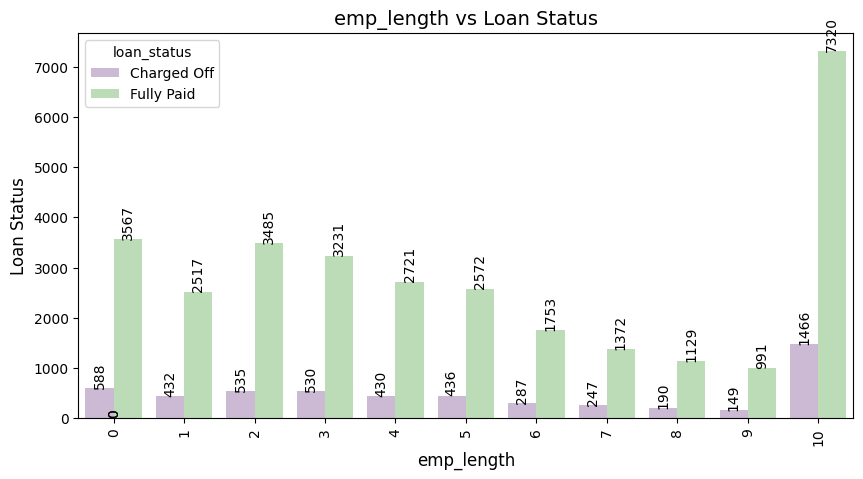

In [87]:
# Distribution of term based on loan_status
plot_graph(loan_data, x_column='emp_length',hue='loan_status',ylabel= 'Loan Status',
           xlabel= 'emp_length',title='emp_length vs Loan Status')


<b>The borrowers whose employee length is 10+ year are mostly getting charged off.

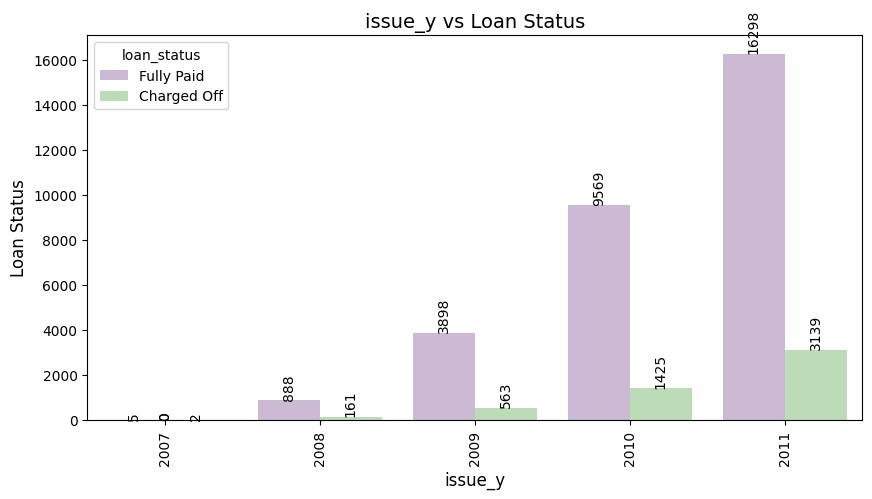

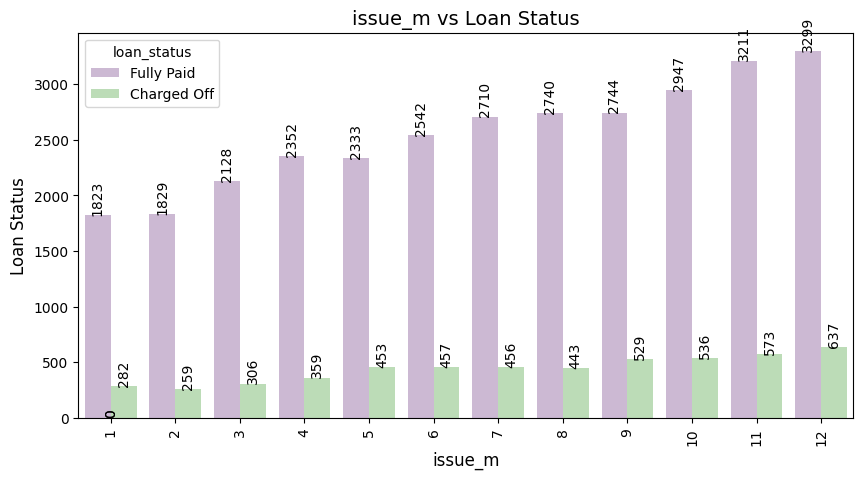

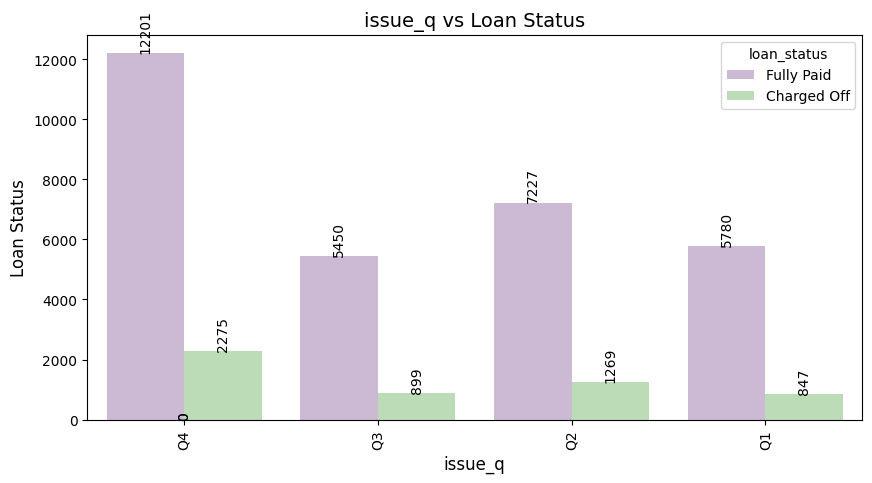

In [88]:
## Distribution of Grade based on loan_status
plot_graph(loan_data, x_column='issue_y',hue='loan_status',
           ylabel= 'Loan Status',xlabel= 'issue_y',title='issue_y vs Loan Status',)
## Distribution of Grade based on loan_status
plot_graph(loan_data, x_column='issue_m',hue='loan_status',
           ylabel= 'Loan Status',xlabel= 'issue_m',title='issue_m vs Loan Status',)
## Distribution of Grade based on loan_status
plot_graph(loan_data, x_column='issue_q',hue='loan_status',
           ylabel= 'Loan Status',xlabel= 'issue_q',title='issue_q vs Loan Status',)

<b>Inference : There are more loan applicants in 2011 ,hence more charge off in 2011 from 2007.

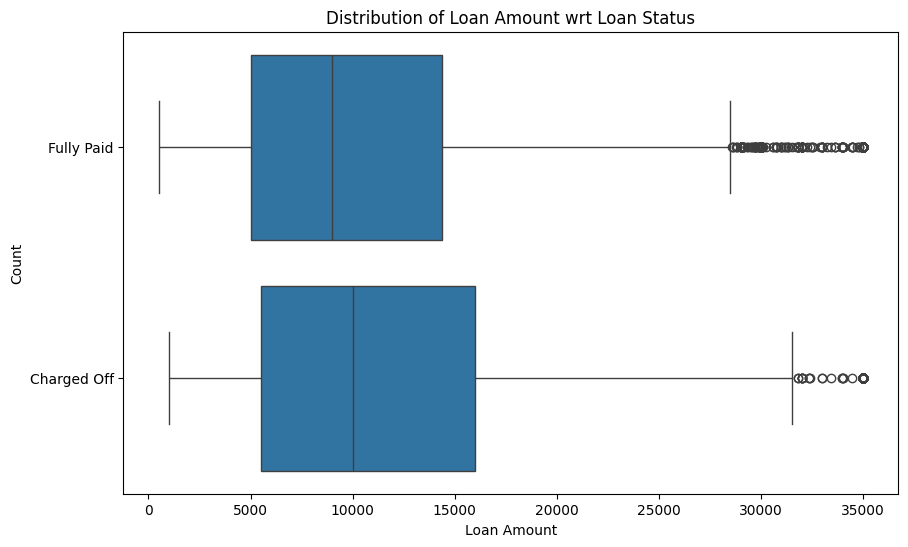

In [89]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,6))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount wrt Loan Status',fontsize=12)
plt.show()


<b>Inference: Large amount of loan has high chances of defaulting

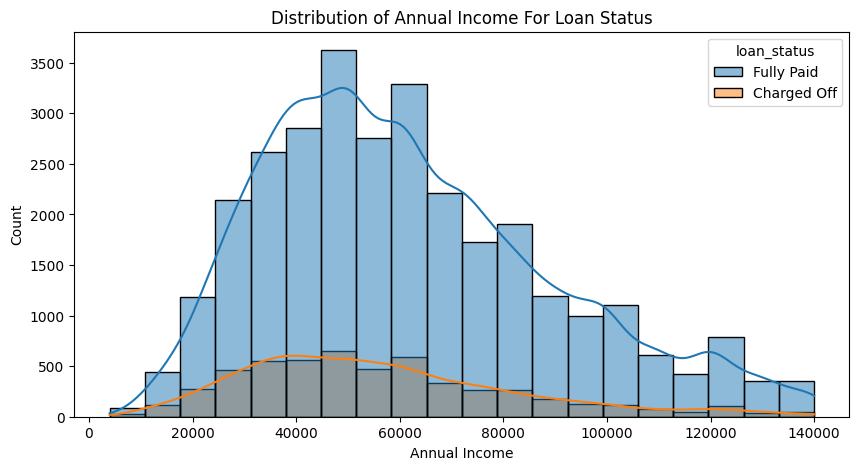

In [90]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

<b>Inference: The loan applicants having annual_income less than 50000 amount are more likely to default.

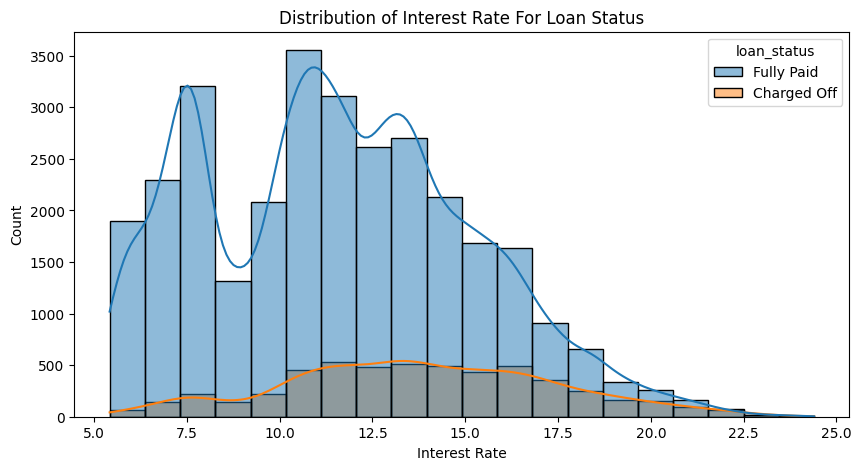

In [91]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

<b>Inference: As interest rate increases default rate also increases but declines after 17.5 % interest rate.

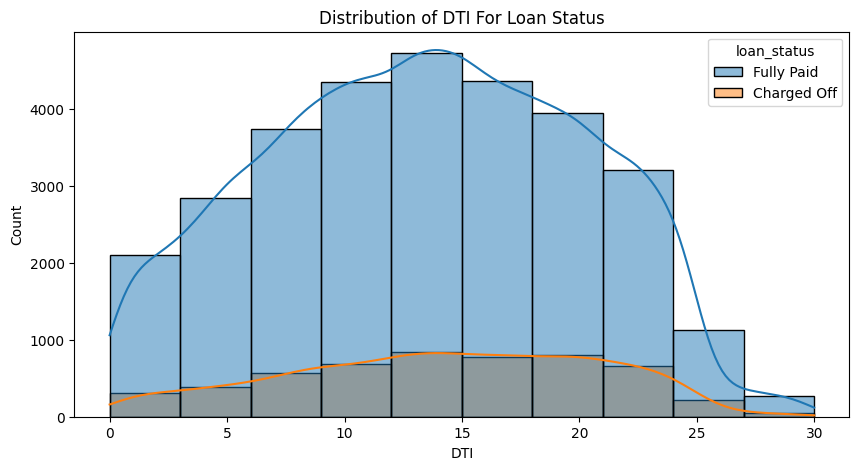

In [92]:
# Distribution of DTI based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='dti',hue='loan_status',bins=10,kde=True)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

<b>Inference: The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

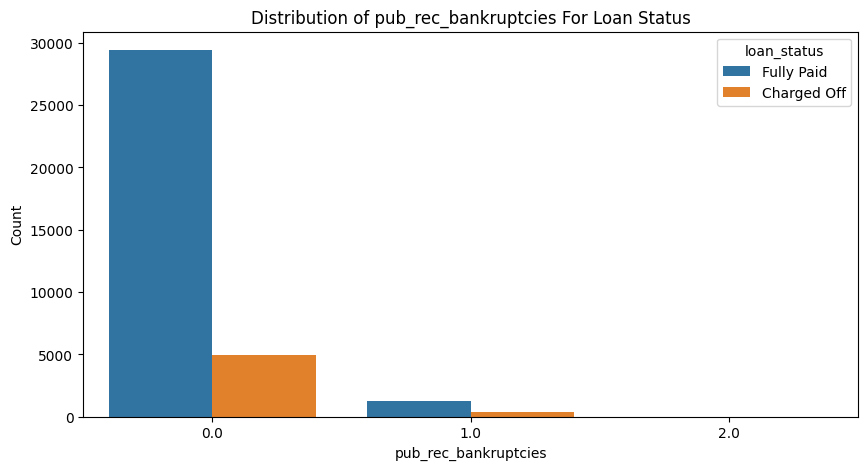

In [104]:
# Distribution of pub_rec_bankruptcies based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='pub_rec_bankruptcies',hue='loan_status')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Count')
plt.title('Distribution of pub_rec_bankruptcies For Loan Status',fontsize=12)
plt.show()

<h1>Observations and Inferences from Segmented Univariate Analysis</h1>


<ol>
<li>Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
<li>The loan applicants belonging to Grades B, C and D contribute to most number of "Charged Off" loans
<li>The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
<li>The 60 month term has higher chance of defaulting as compared to 36 month term.
<li>The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
<li>The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
<li>The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
<li>Borrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
<li>The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
<li>The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
<li>The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan
    </ol>

<h2> Bivariate Analysis </h2>

<h4>Analysis of interest rate with every other column to gain insights :</h4>

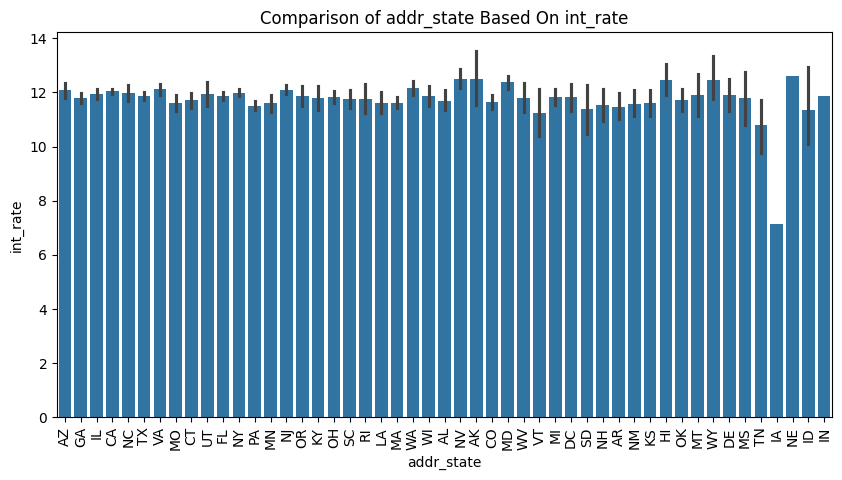

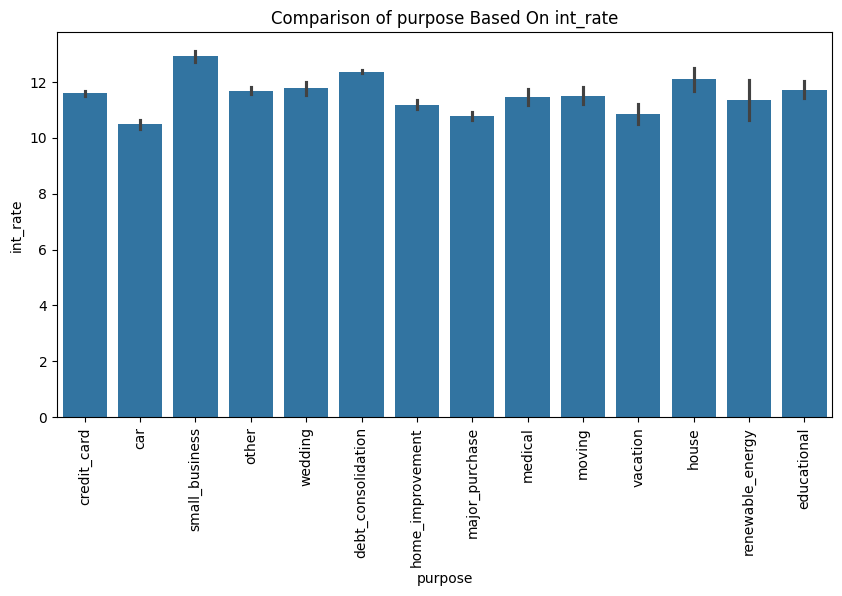

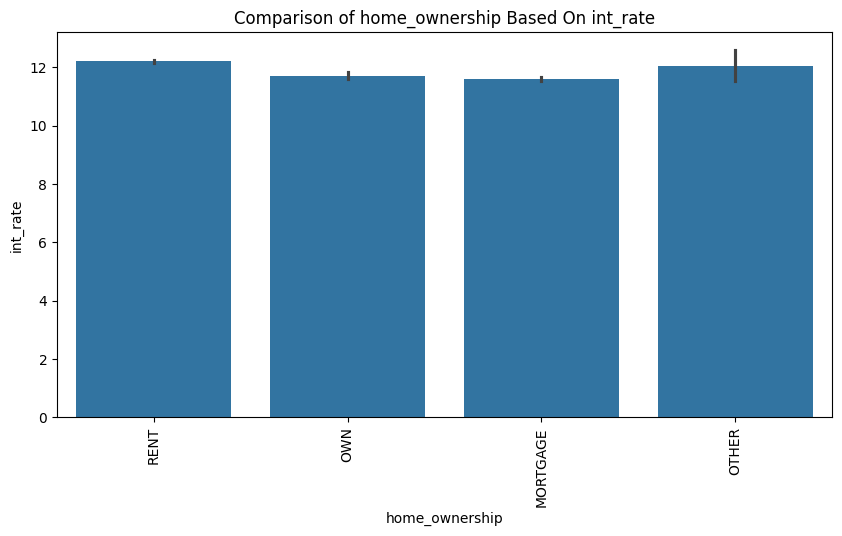

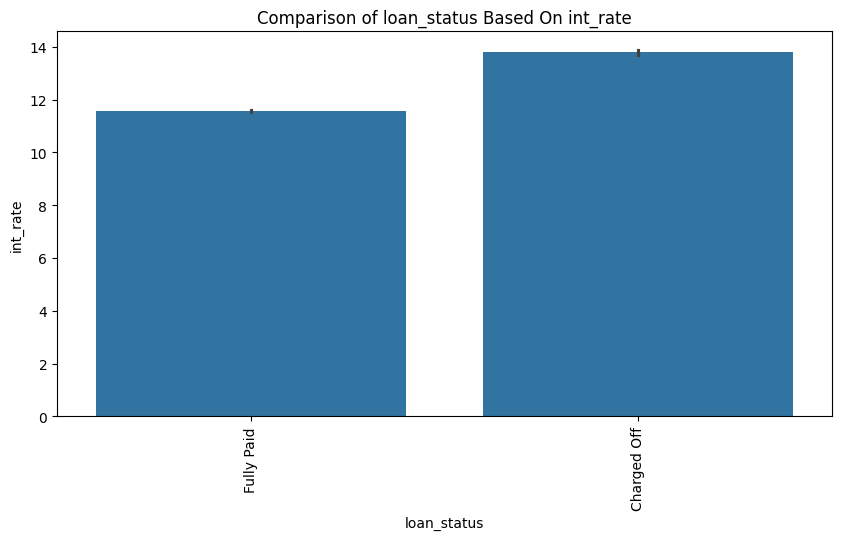

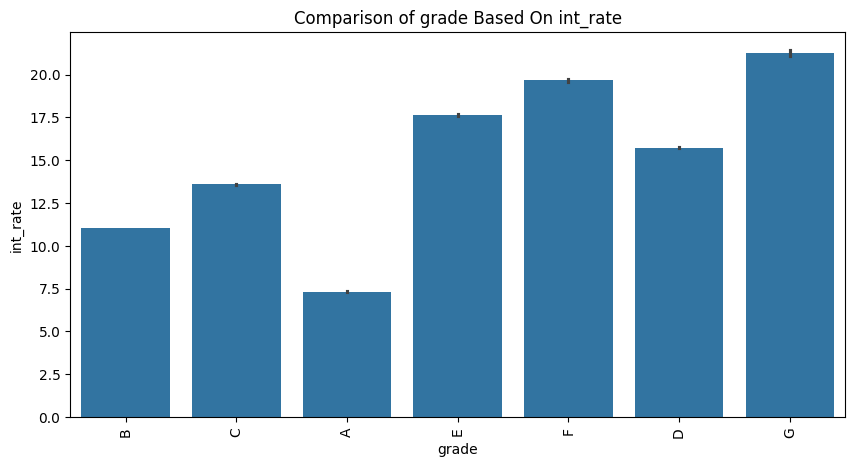

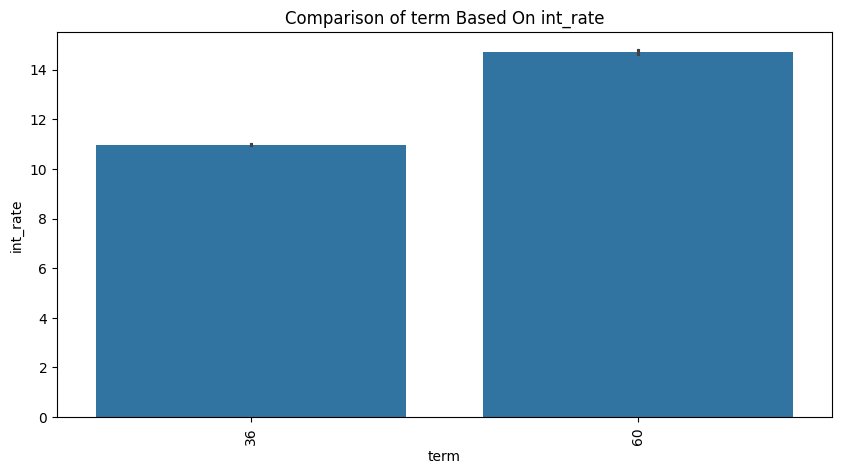

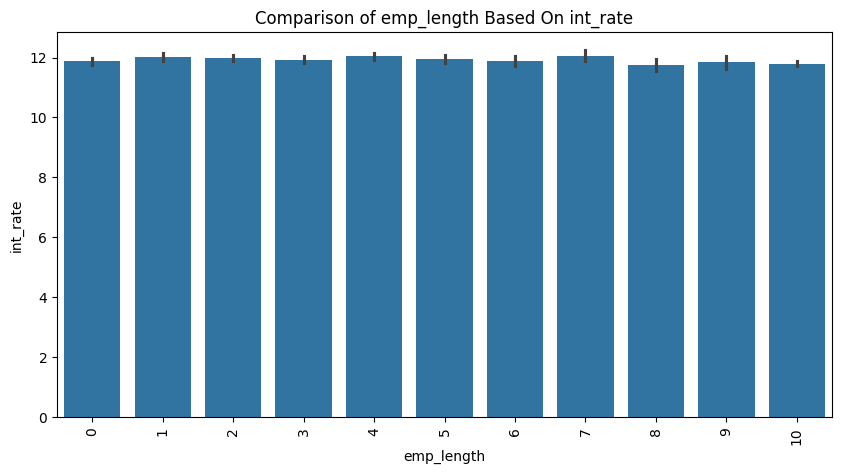

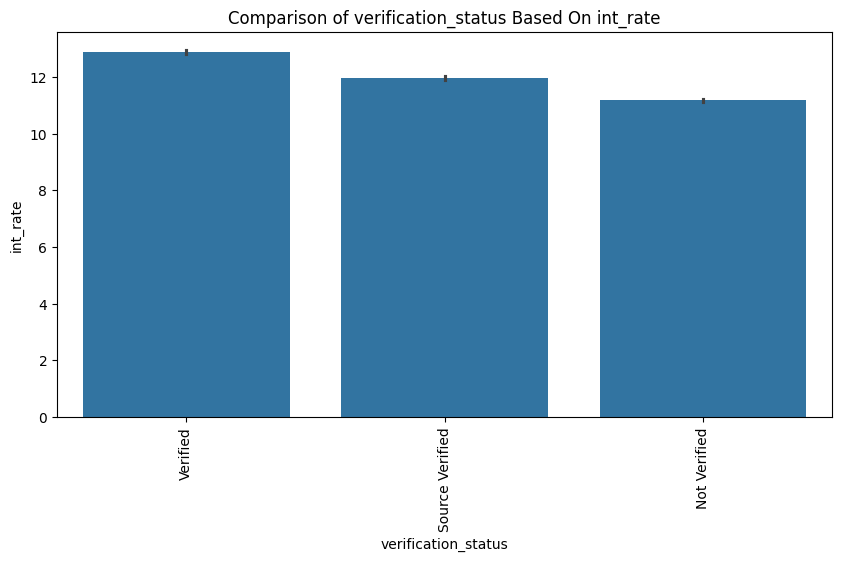

In [95]:
# Comparison of interest rate based on addr_state', 'purpose', 'home_ownership', 'loan_status','grade', 'term', 'emp_length'
for var in ['addr_state', 'purpose', 'home_ownership', 'loan_status','grade', 'term', 'emp_length' ,'verification_status']:
    create_bar_plot(x = var,y = 'int_rate',data=loan_data,xlabel=var,ylabel='int_rate')
    

<b>Inferences from Bivariate analysis of interest rate with other columns:</b>
<ol>
<li>In purpose vs interest rate variable, small business , debt consolidation and house loan are getting loans at higher interest rate than others.
<li>Interest rate increases with grade.G has maximum interest rate.
<li>In term vs interest rate variable, interest rate is less for 36 months tenure and higher for 60 months tenure.
<li>Verified borrower gets more loan at higher interest rate compared to others.
<li>In loan status vs interest rate variable, the borrowers who took loans at higher interest rate are most likely to default.
<li>In home ownership vs interest rate, the borrowers who are on rent gets loan at higher interest rate. The borrowers with own and mortgage are getting loan with lesser interest rate.
<li>There is no relation between Employment length and interest rate.

<h4>Analysis of Loan amount with every other column to gain insights :

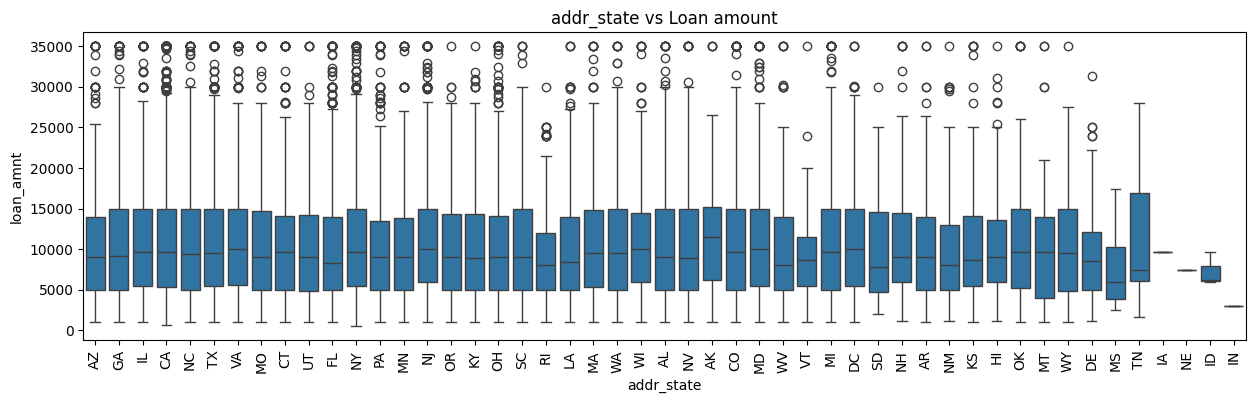

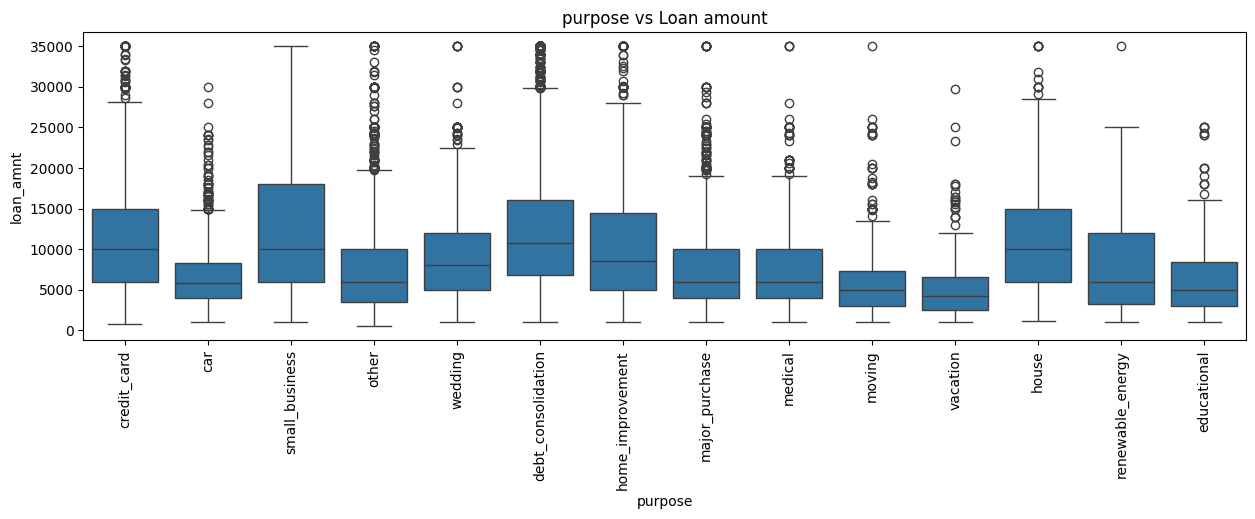

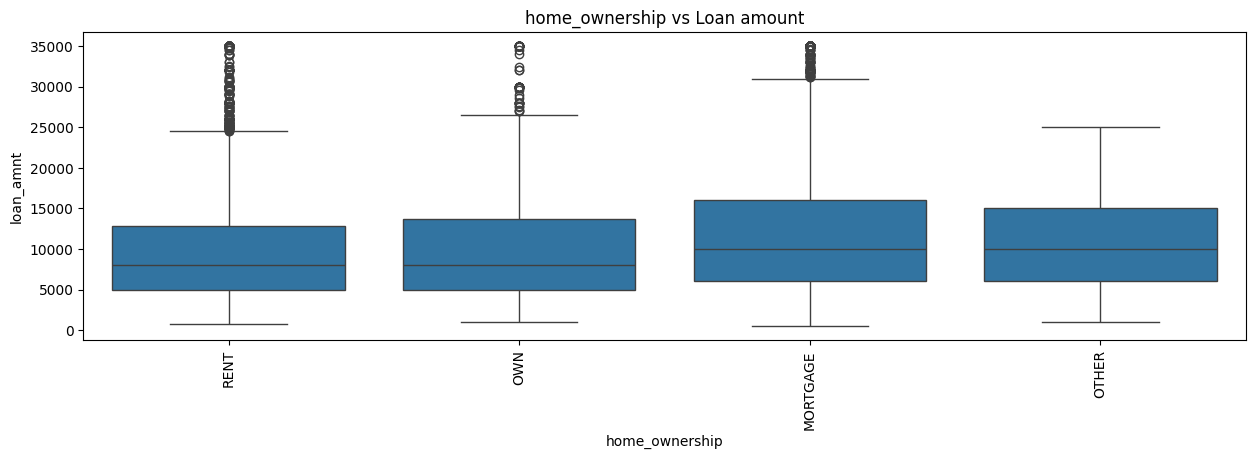

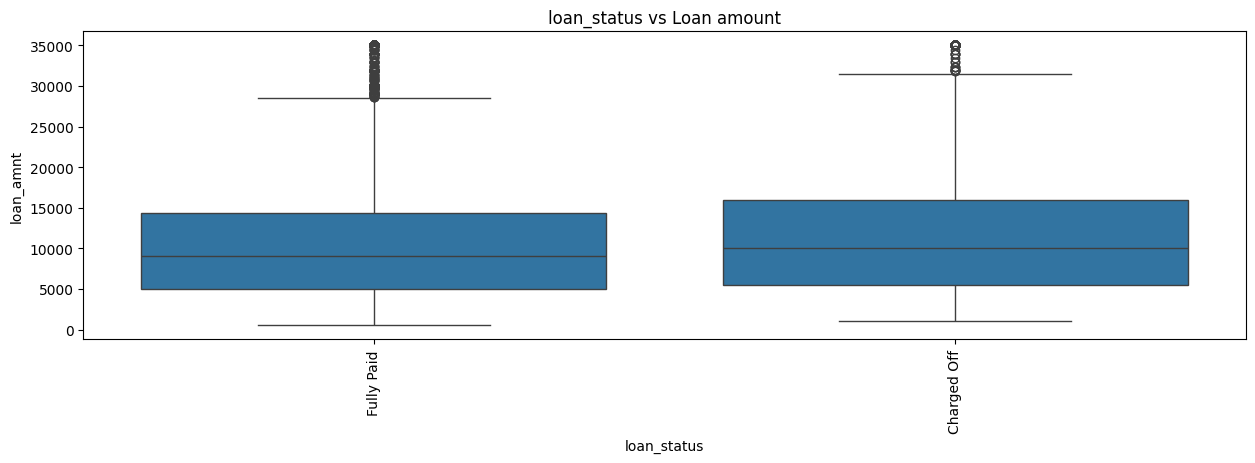

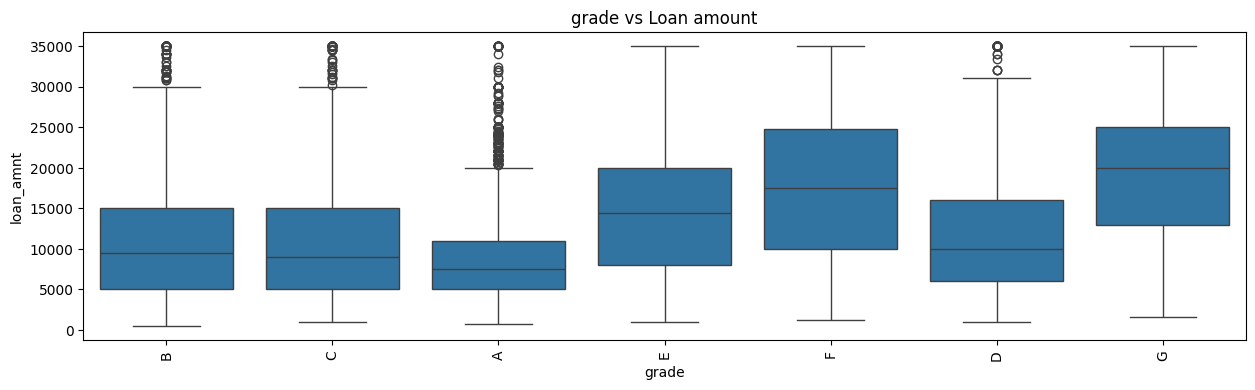

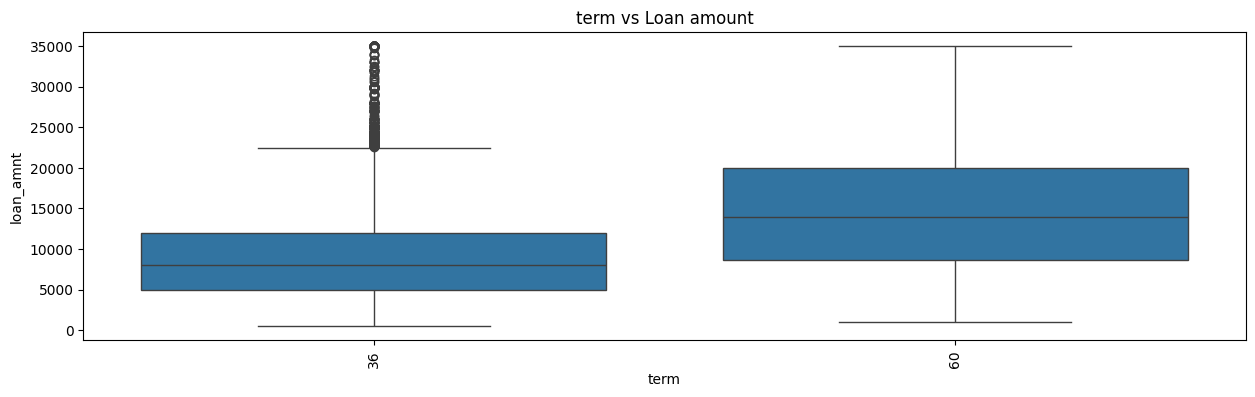

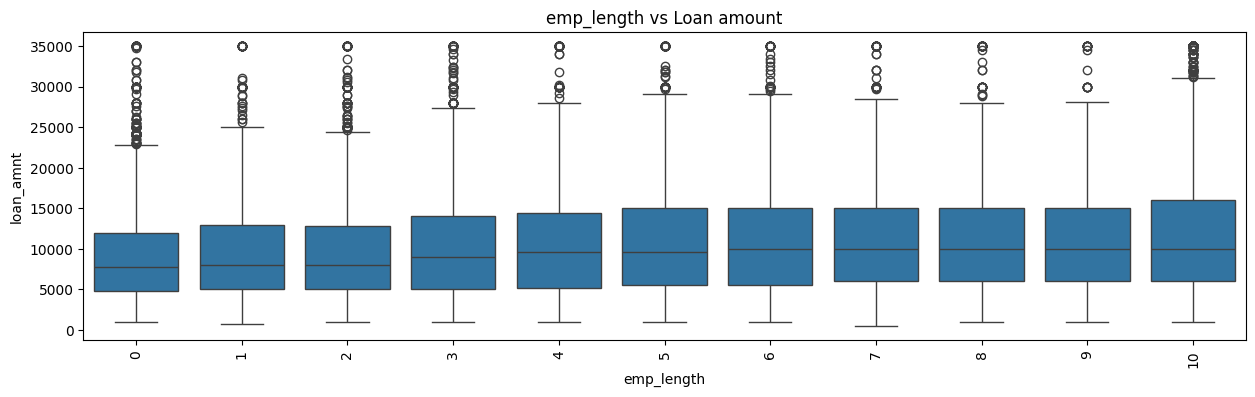

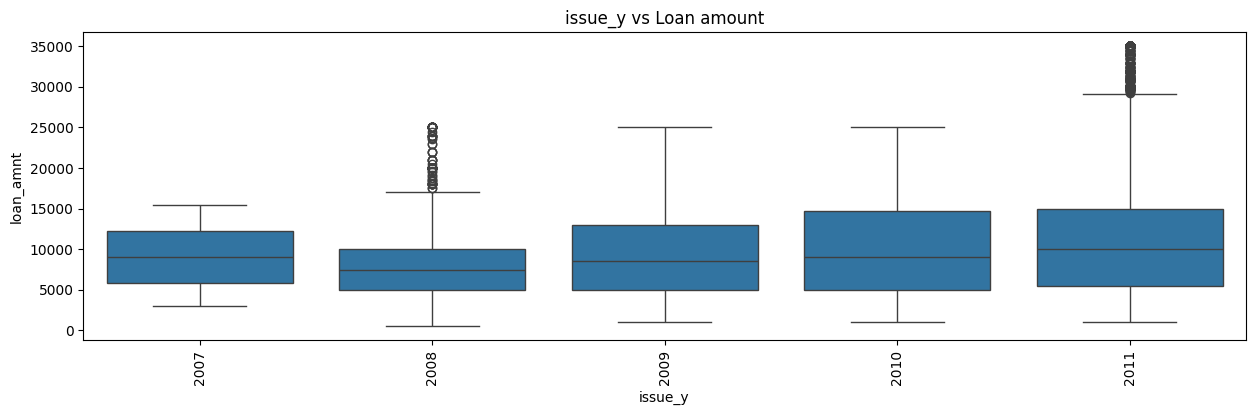

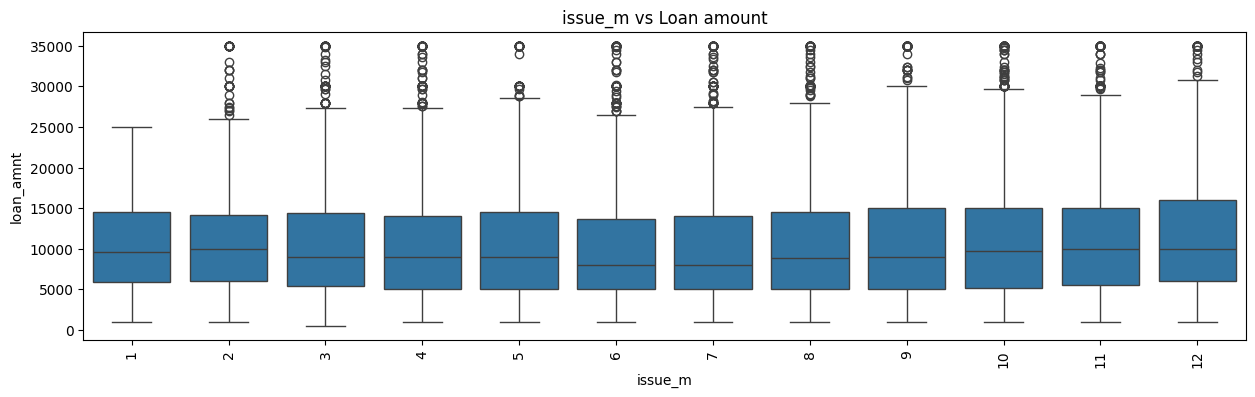

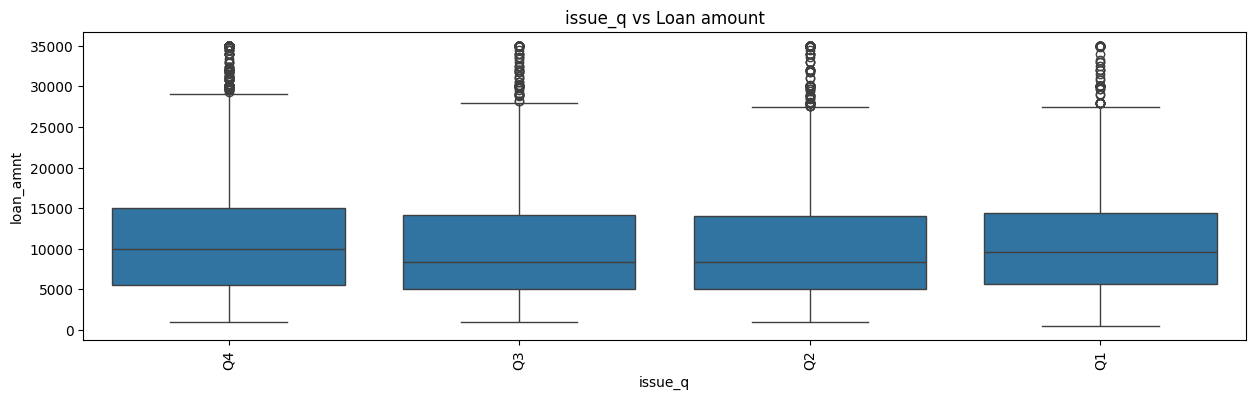

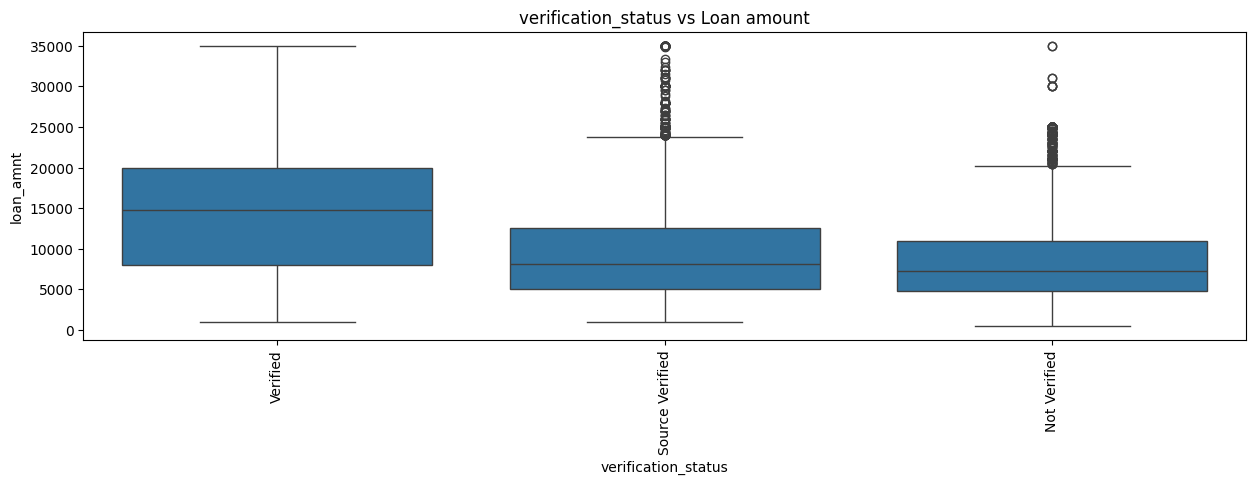

In [97]:
for var in ['addr_state', 'purpose', 'home_ownership', 'loan_status','grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q','verification_status' ]:
    create_boxplot(x = var,y = 'loan_amnt',data=loan_data,x_label=var,y_label='Loan amount')
    

<b>Inferences from Bivariate analysis of Loan amount with other columns::</b>
    <ol>
<li>In loan amount vs term variable, more the loan amount higher is the tenure i.e. 60 months.
<li>Verified borrowers gets more loan amount than Non-verified.
<li>In loan amount vs Loan status variable, charged off loans had higher loan amount than fully paid loans.
<li>In Grade vs loan amount, Grade F & G have taken maximum amount of loan. As the grade decreases amount of loan is increasing.Higher the grade more is the risk of default.
<li>In loan amount vs home ownership variable, the borrower who are from Mortgage have taken higher amount of loan than others.
<li>In loan amount vs purpose variable,small business borrowers have taken higher loan amount than others followed by debt_consolidation.
<li>In loan amount vs employee length variable, the borrower who has 10+ years of experience are taking high amount of loan than others.
<li> The risk of loan getting charged off increases with loan_amount. Higher the loan amount more is the charged off frequency.

<h4>Analysis of annual income  with every other column to gain insights :

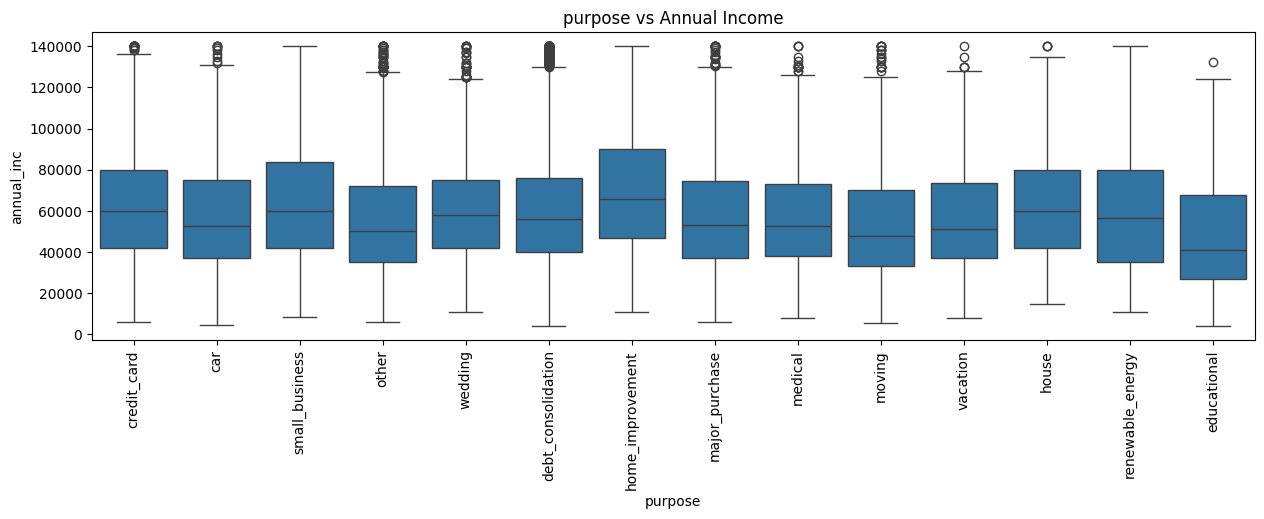

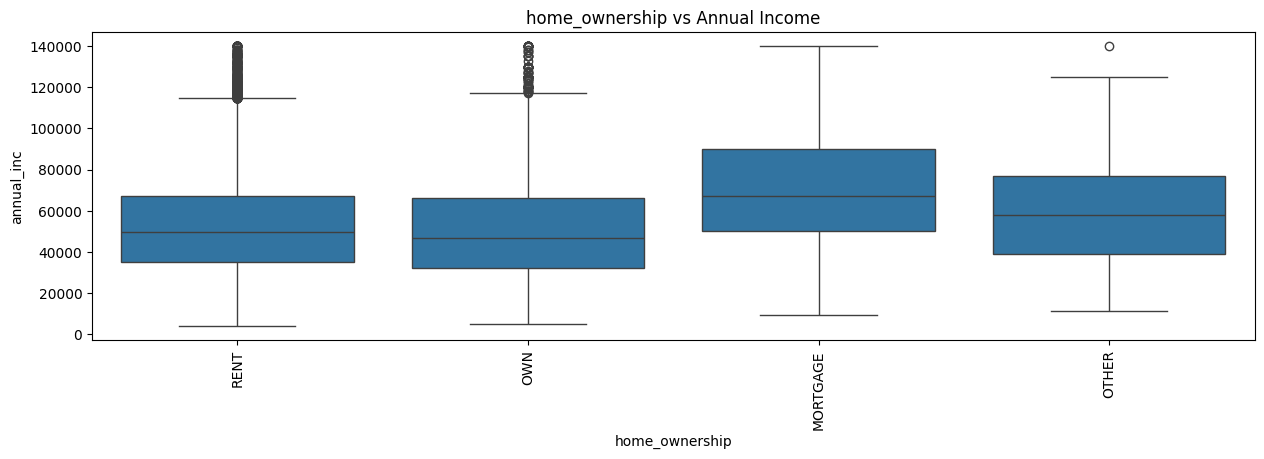

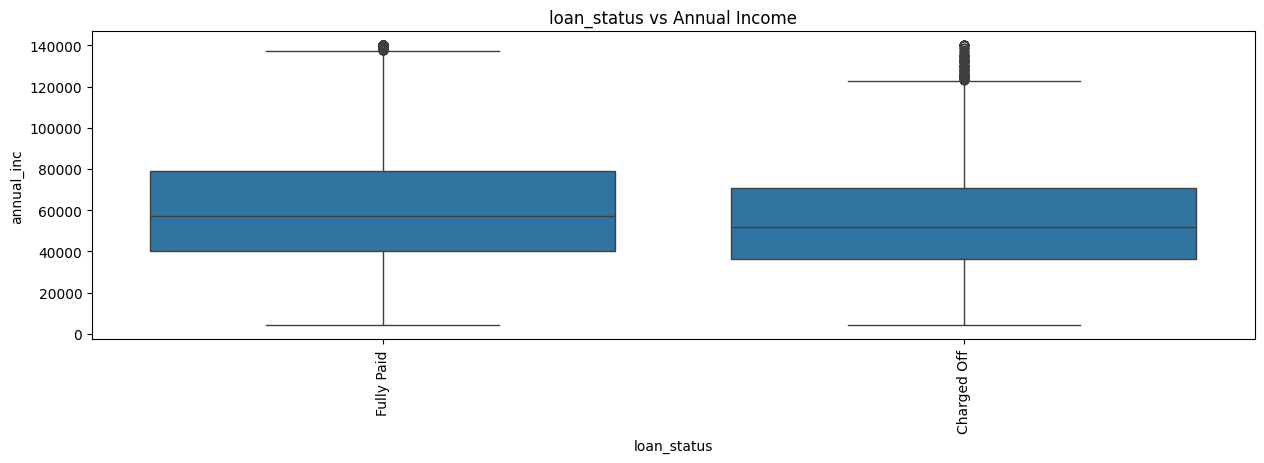

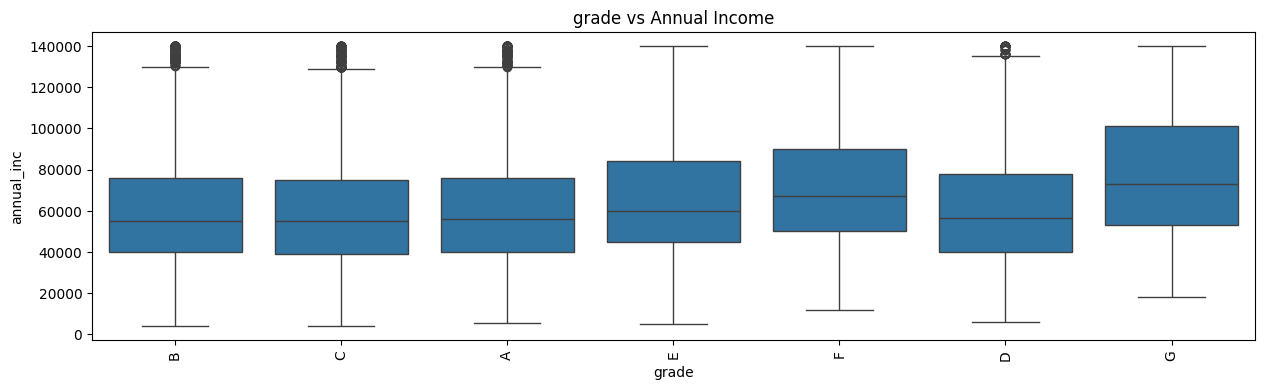

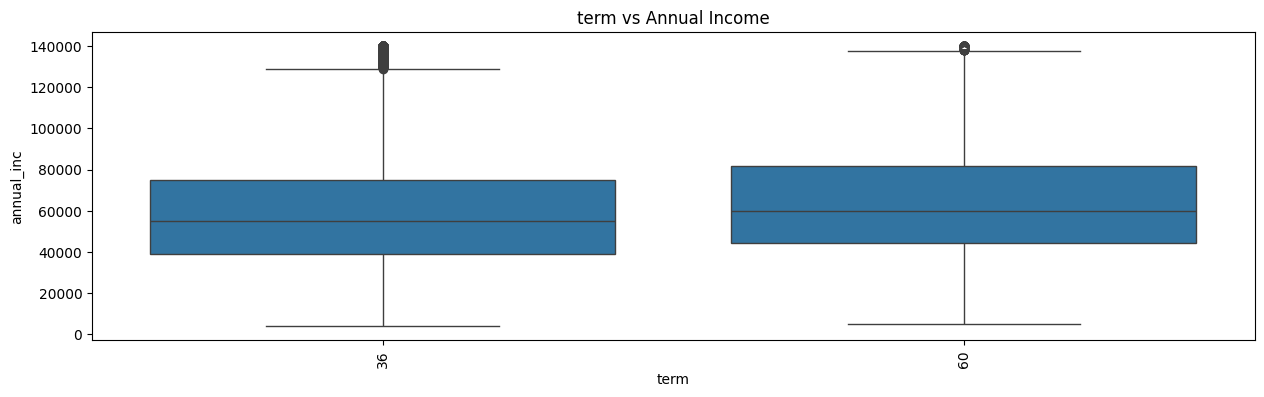

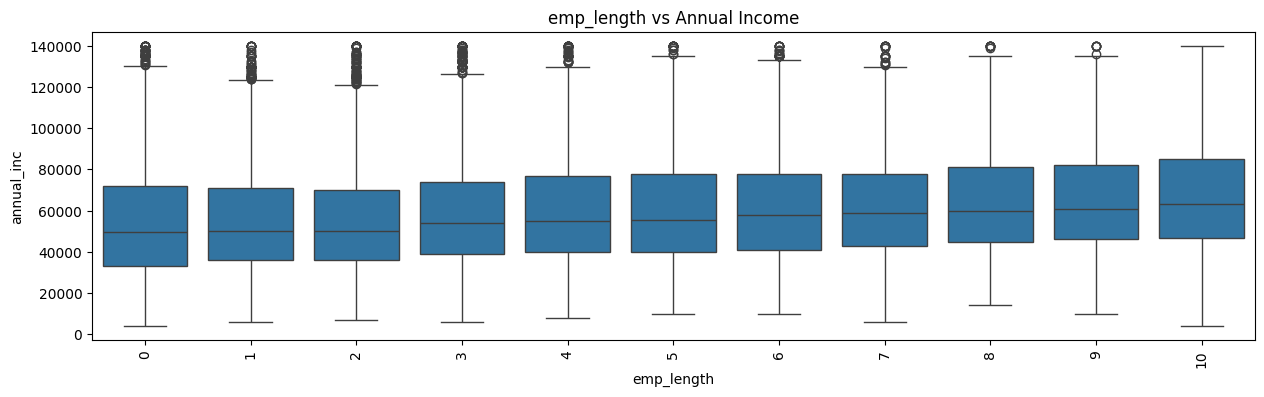

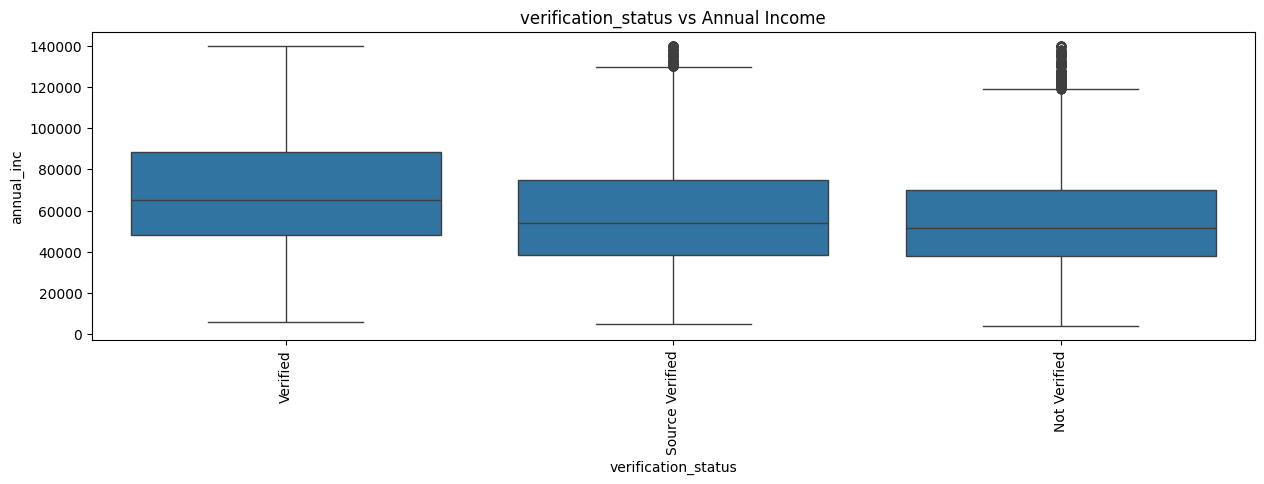

In [98]:
# Comparison of annual_inc with other columns
for var in ['purpose', 'home_ownership', 'loan_status','grade', 'term', 'emp_length', 'verification_status' ]:
    create_boxplot(x = var,y = 'annual_inc',data=loan_data,x_label=var,y_label='Annual Income')
    

<b> Inferences from Bivariate analysis of annual income with other columns: </b>
<li>In Annual Income vs Purpose variable, the borrowers who has high annual income are taking loans mostly for home improvement and small business.
<li>In Term vs Annual Income variable, the borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months.
<li>In Verification status vs annual income, mostly the verified borrowers are having high annual income than others.
<li>In Annual Income vs Home Ownership variable, the borrowers who have the status as Mortgage are having high annual income than others.
<li>The borrowers who has 10+ experience are having highest annual income than others and >1 is having least.


<h4> Analysis of dti with every other column to gain insights :

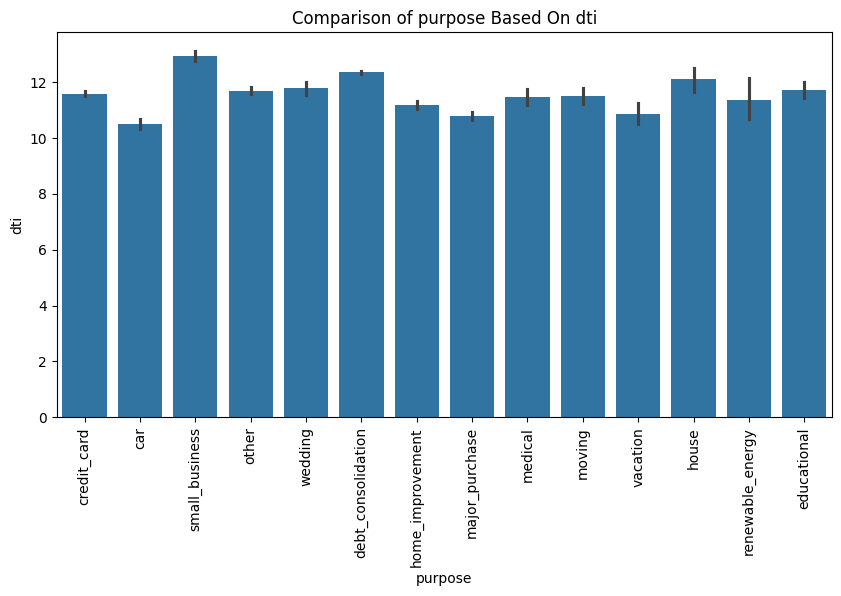

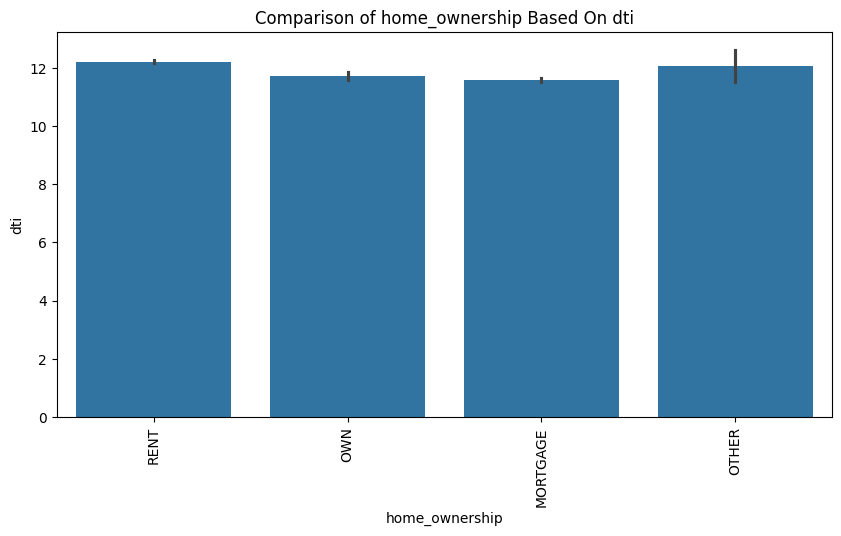

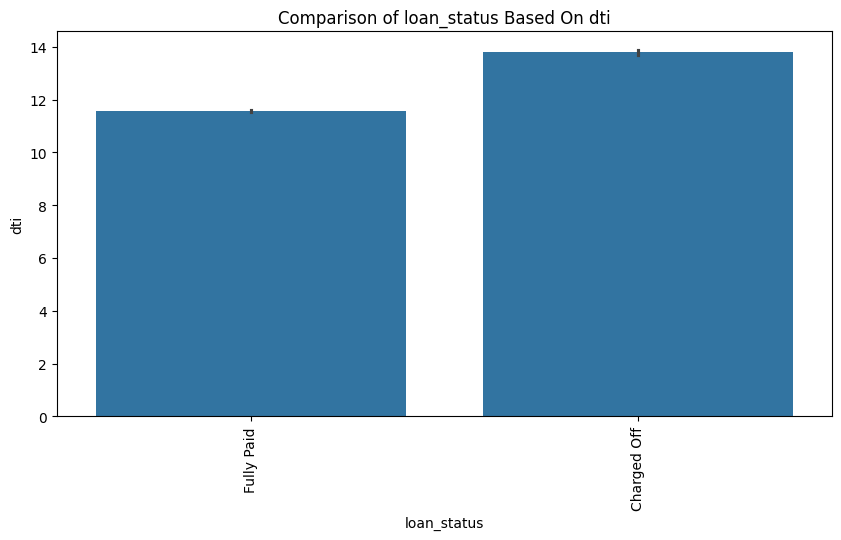

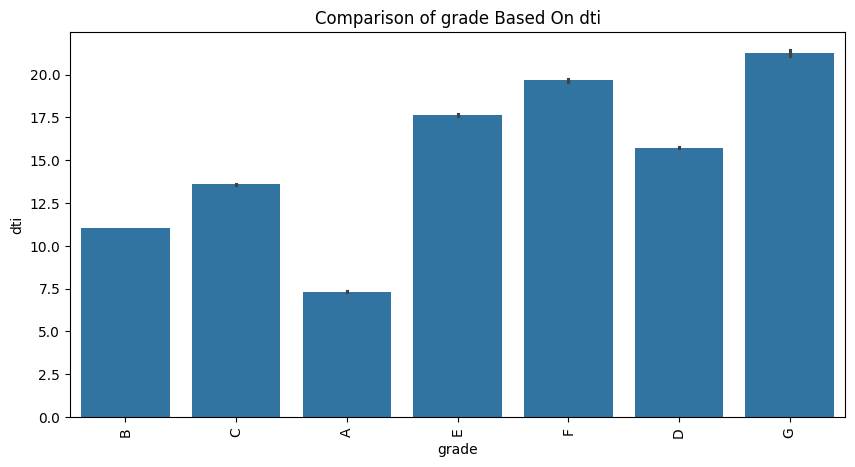

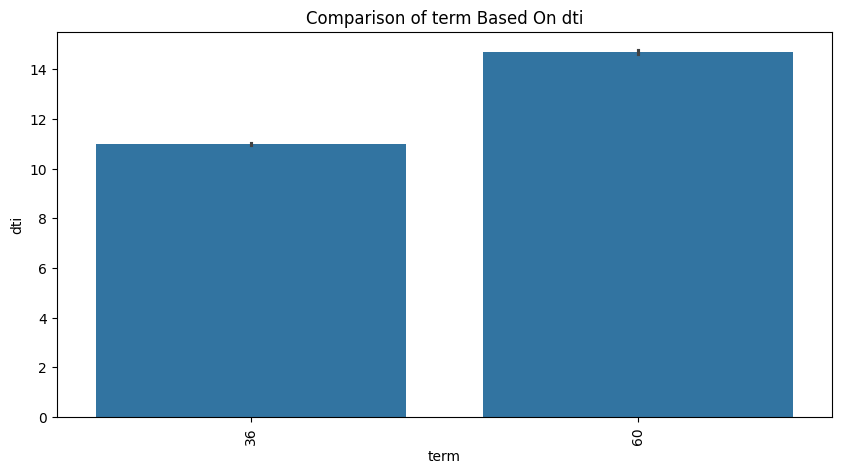

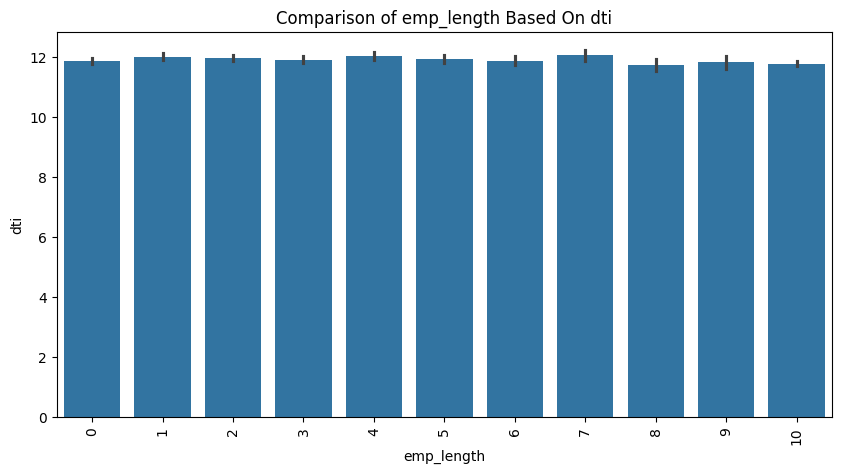

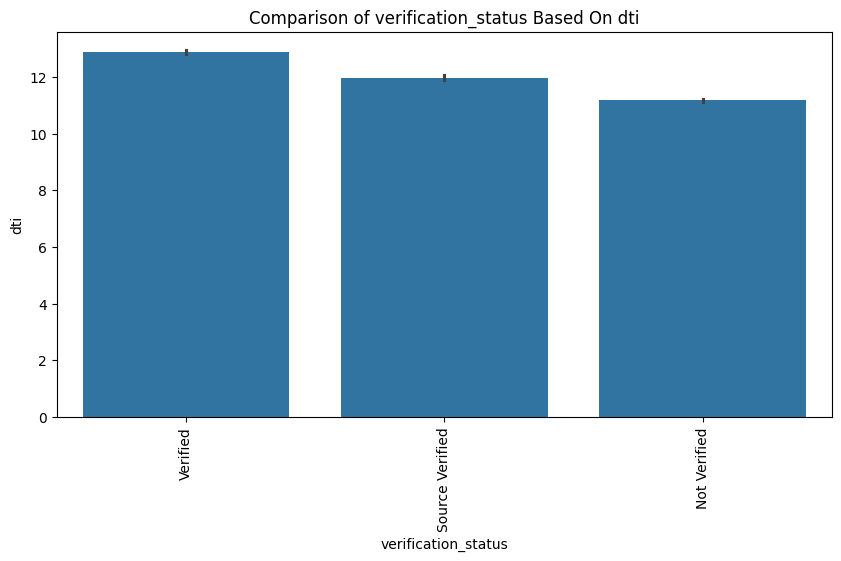

In [99]:
# Comparison of dti based on 'purpose', 'home_ownership', 'loan_status','grade', 'term', 'emp_length'
for var in ['purpose', 'home_ownership', 'loan_status','grade', 'term', 'emp_length' ,'verification_status']:
    create_bar_plot(x = var,y = 'dti',data=loan_data,xlabel=var,ylabel='dti')
    

<b> Inferences from Bivariate analysis of DTI with other columns: </b>
<li>DTI ratio is high for the borrower who has 60 months tenure.
<li>Verified borrowers are having high dti ratio.
<li>Most of the defaulted borrowers have high dti ratio.
<li>As grade decreases dti ratio is increasing. G has maximum dti ratio.
<li>In dti vs home ownership variable, the borrower with rent and other are have high dti ratio than others.
<li>In purpose vs dti variable, the borrower who takes loan for the purpose of debt consolidation and credit card are having high dti ratio than others.

<h2>Correlation</h2>

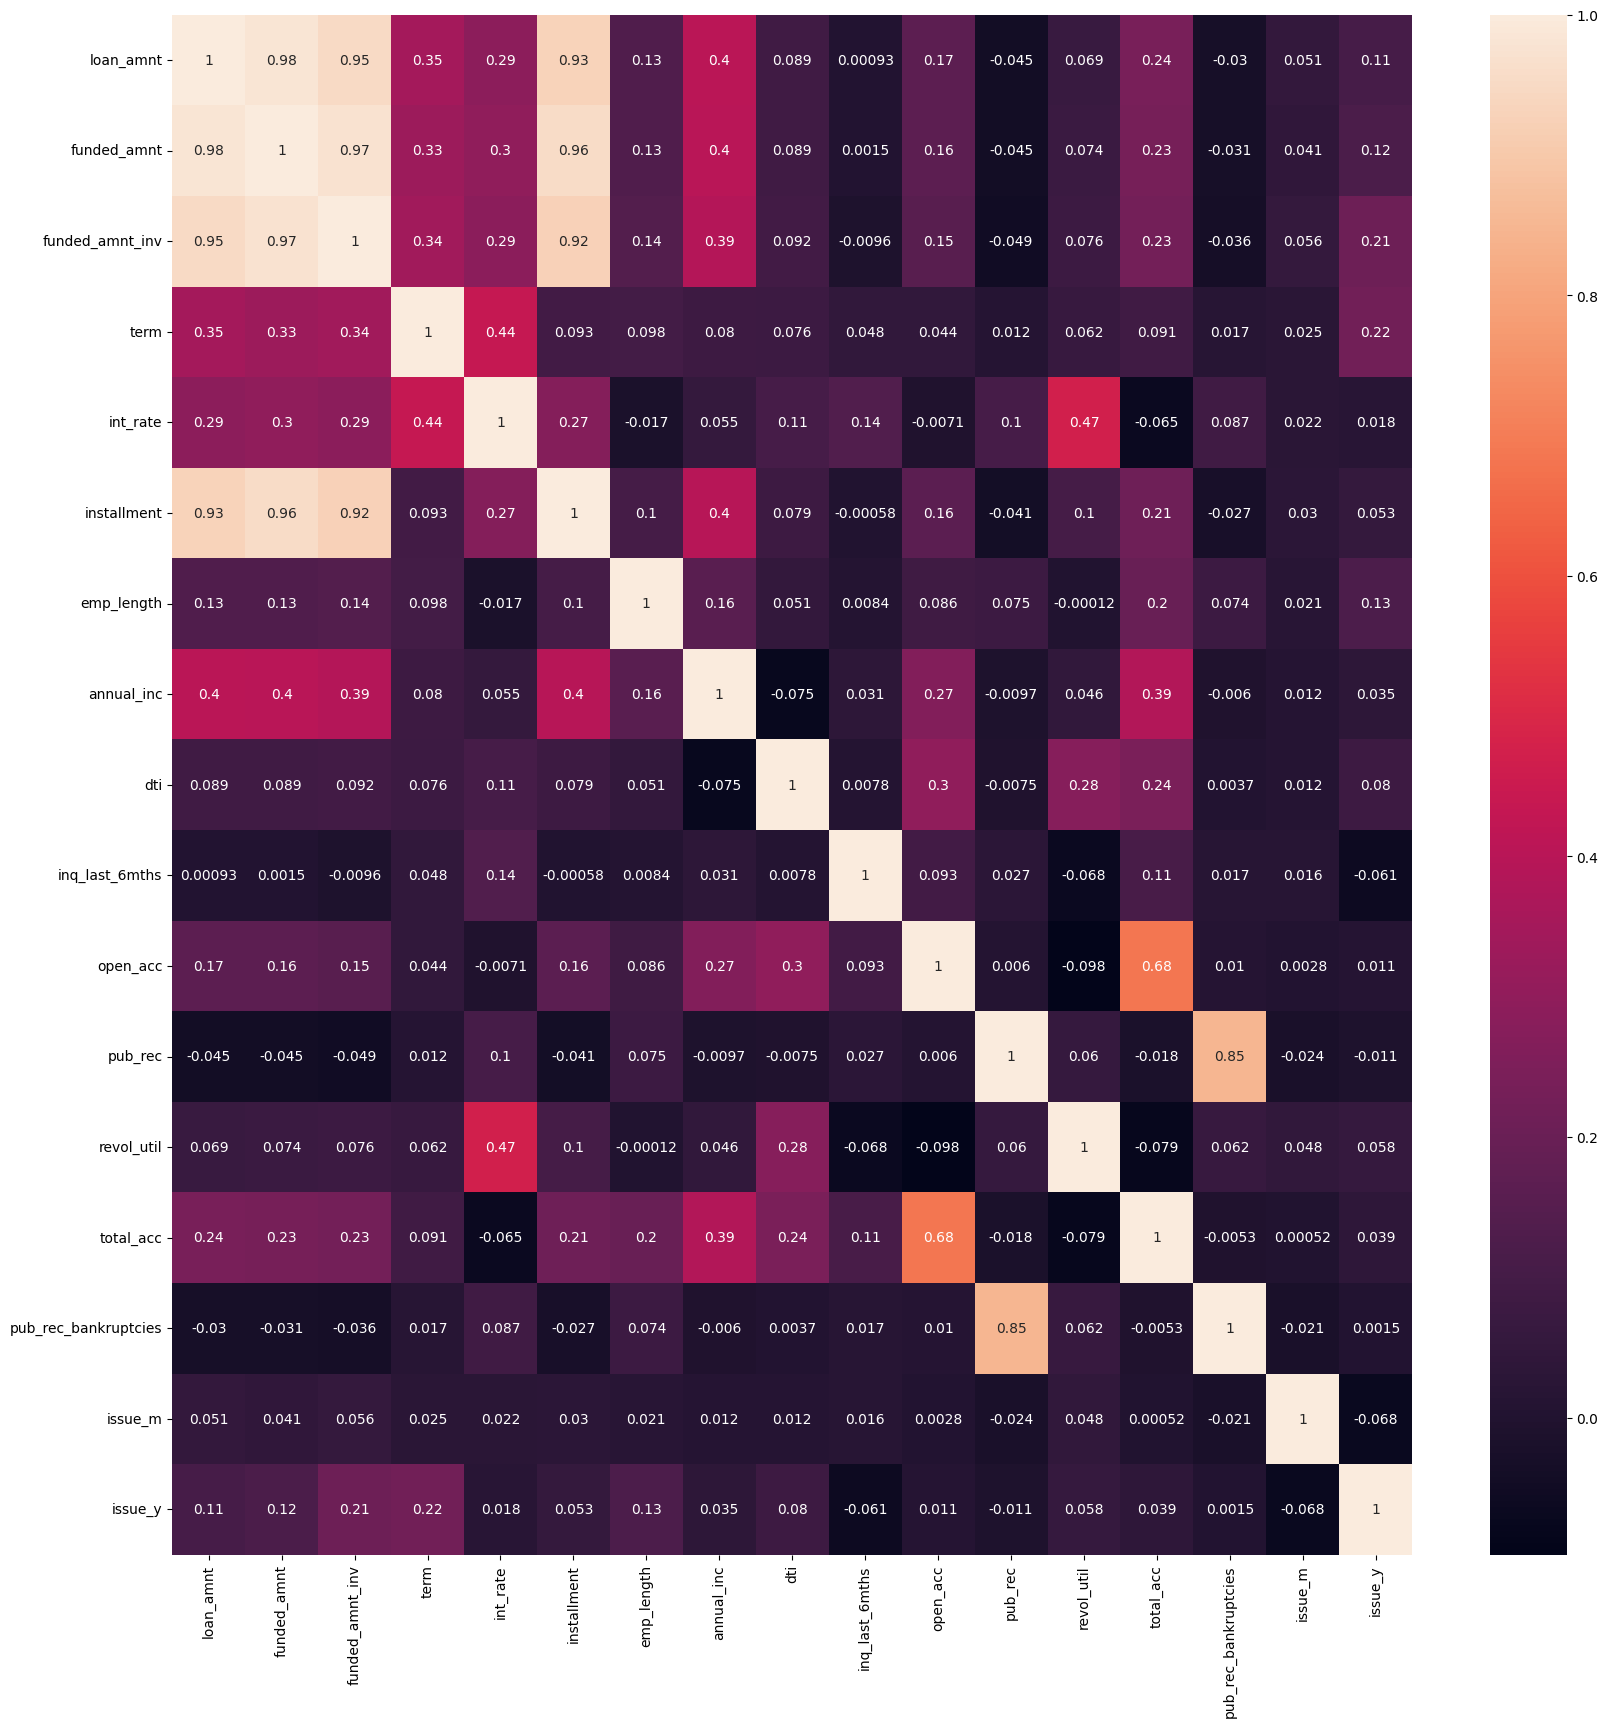

In [100]:
# Heatmap of correlation between variables
plt.figure(figsize=(20,20))
sns.heatmap(loan_data.corr(numeric_only=True),annot=True)
plt.show()

<b>Strong Correlation</b>
<li>installment, funded_amnt, loan_amnt, and funded_amnt_inv has strong correlation with each other

<b>Weak Correlation</b>
<li>dti has weak correlation with most of the fields
<li>emp_length has weak correlation with most of the fields

<b>Negative Correlation</b>
<li>annual_inc and dti is negatively correlated.
<li>pub_rec_bankrupticies has a negative correlation with almost every field

<h2>Recommendations:</h2>

Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
<ol>
<li>interest_rate
<li>annual_income
<li>Debt to income ratio
<li>Grades
<li>Verification Status
<li>Loan amoun
<li>Pub_rec_bankruptcies
<li>Home ownership
    <li>Purpose
        <li>Emp Length
    </ol>
    
From above analysis we can say that, there is more probability of defaulting when:
<li>Borrowers who are taking loan for the ‘60 months’ tenure.
<li>Borrowers having Public Recorded Bankruptcy.
<li>Borrowers whose loan status is ‘Verified’ as they taken high amount of loan with 60 months tenure.
<li>Borrowers who are having home ownership as ‘Rent’ and they take loan for the purpose of debt consolidation.
<li>Borrowers whose annual income is low i.e. (0-20000).
<li>Borrowers who takes loan amount in the range 0 to 14000.
<li>Borrowers who receive interest at the rate of 15-20%.
<li>Borrower who takes loan for the purpose of small business or debt consolidation.
<li>Borrower with least grades and sub_grades like E,F,G which indicates high risk.
<li>Borrower with very high Debt to Income value.
<li>Borrower with working experience 10+ years.
<li>Borrowers who does not belong to large urban cities like CA, NY etc.